<a href="https://colab.research.google.com/github/jasanchez19/Machine-Learning-Tensors-and-Neural-Networks/blob/main/Homework5JorgeSanchezECGR4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5

Problem 1

In [2]:
import matplotlib as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import imageio
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression 
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms

In [4]:
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [6]:
def model(t_u, w0, w1, b):
    return w0 * t_u**2 + w1 * t_u + b

def loss_fn(predicted, actual):
    squared_diffs = (predicted - actual)**2
    return squared_diffs.mean()

In [7]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [11]:
#validate new model

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

loss.backward()
optimizer.step()

params

tensor([-2.3139e+03, -3.5181e+01, -5.9642e-01], requires_grad=True)

In [13]:
#zero gradient

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()

loss.backward()
optimizer.step()

params

tensor([-2.3139e+03, -3.5181e+01, -5.9642e-01], requires_grad=True)

In [14]:
#initial significance

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

loss.backward()
optimizer.step()

params

tensor([-2.3139e+03, -3.5181e+01, -5.9642e-01], requires_grad=True)

In [15]:
#zero gradient significance

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()

loss.backward()
optimizer.step()

params

tensor([-2.3139e+03, -3.5181e+01, -5.9642e-01], requires_grad=True)

In [16]:
rates_to_learn_at = [1/x for x in [10, 100, 1000, 10000, 100000]]

def training_loop(n_epochs, optimizer, params, t_u, t_c, epoch_report_val = 500):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()

        if epoch % epoch_report_val == 0:
            print(f'    Epoch {epoch}, Loss {float(loss)}')
            
    return params

In [17]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = rates_to_learn_at[3]
optimizer = optim.SGD([params], lr=learning_rate) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, 
    t_u = t_un,
    t_c = t_c)

    Epoch 500, Loss 10.708596229553223
    Epoch 1000, Loss 8.642083168029785
    Epoch 1500, Loss 7.1710052490234375
    Epoch 2000, Loss 6.123478412628174
    Epoch 2500, Loss 5.377227306365967
    Epoch 3000, Loss 4.8452863693237305
    Epoch 3500, Loss 4.465787887573242
    Epoch 4000, Loss 4.194724082946777
    Epoch 4500, Loss 4.0008015632629395
    Epoch 5000, Loss 3.8617441654205322


tensor([ 0.5570, -0.8881, -0.8753], requires_grad=True)

In [18]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = rates_to_learn_at[3]
optimizer = optim.Adam([params], lr=learning_rate) 

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params,
    t_u = t_u, 
    t_c = t_c
    )

    Epoch 500, Loss 10577728.0
    Epoch 1000, Loss 9524402.0
    Epoch 1500, Loss 8545122.0
    Epoch 2000, Loss 7634292.5
    Epoch 2500, Loss 6787368.0
    Epoch 3000, Loss 6000706.0
    Epoch 3500, Loss 5271407.5
    Epoch 4000, Loss 4597170.0
    Epoch 4500, Loss 3976134.25
    Epoch 5000, Loss 3406753.75


tensor([ 0.5412,  0.5412, -0.4588], requires_grad=True)

In [19]:
from matplotlib import pyplot as plt

def graph_temp(model, params, t_u, t_c, title:str):
    t_range = torch.arange(20., 85., .1).unsqueeze(1)
 
        
    fig = plt.figure(dpi=600)
    plt.title(title)
    plt.xlabel("Fahrenheit")
    plt.ylabel("Celsius")
    plt.plot(t_u.numpy(), t_c.numpy(), 'o')
    plt.plot(t_range.numpy(), model(0.1*t_range, *params).detach().numpy(), 'c-')
    plt.plot(t_u.numpy(), model(0.1 * t_u, *params).detach().numpy(), 'kx')



  Learning rate is 0.1 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss nan
    Epoch 1000, Loss nan
    Epoch 1500, Loss nan
    Epoch 2000, Loss nan
    Epoch 2500, Loss nan
    Epoch 3000, Loss nan
    Epoch 3500, Loss nan
    Epoch 4000, Loss nan
    Epoch 4500, Loss nan
    Epoch 5000, Loss nan
Final Paramaters: tensor([nan, nan, nan], requires_grad=True)

------------------------------------------------------------

  Learning rate is 0.01 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss nan
    Epoch 1000, Loss nan
    Epoch 1500, Loss nan
    Epoch 2000, Loss nan
    Epoch 2500, Loss nan
    Epoch 3000, Loss nan
    Epoch 3500, Loss nan
    Epoch 4000, Loss nan
    Epoch 4500, Loss nan
    Epoch 5000, Loss nan
Final Paramaters: tensor([nan, nan, nan], requires_grad=True)

------------------------------------------------------------

  Learning rate is 0.001 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss nan
    Epoch 1000, Loss nan
    Epoch 1500, Loss nan
    Epo

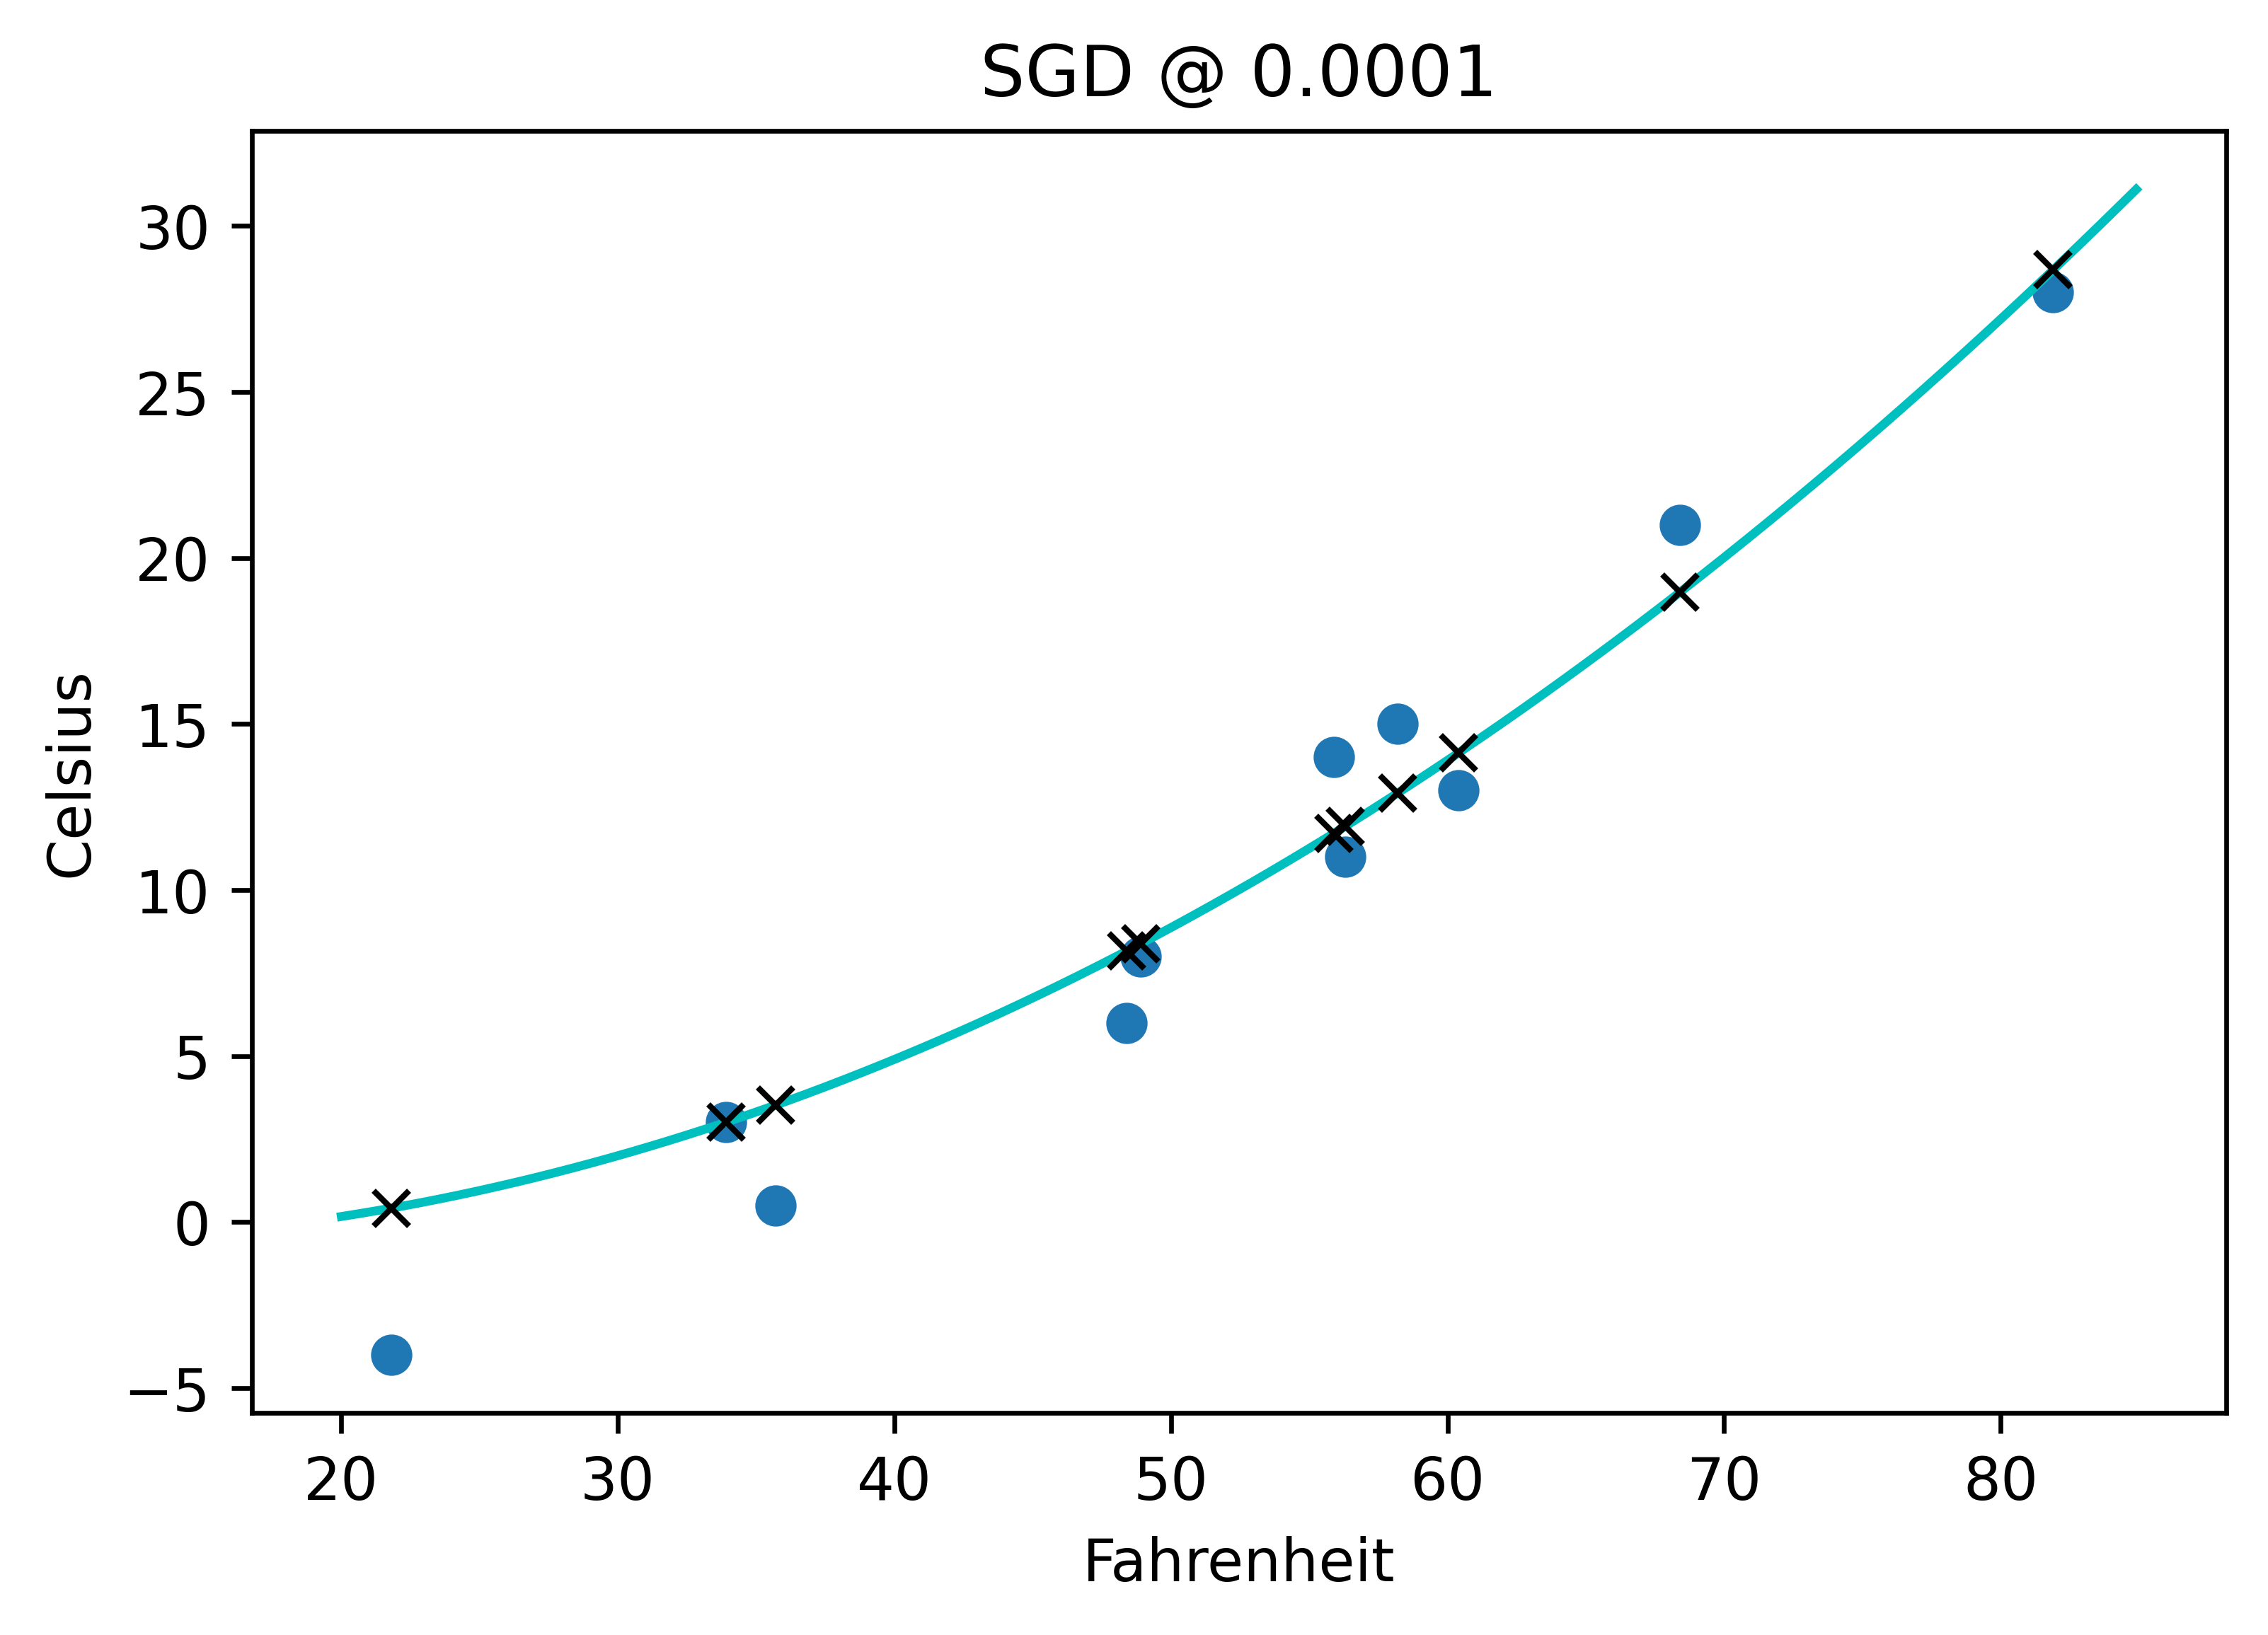

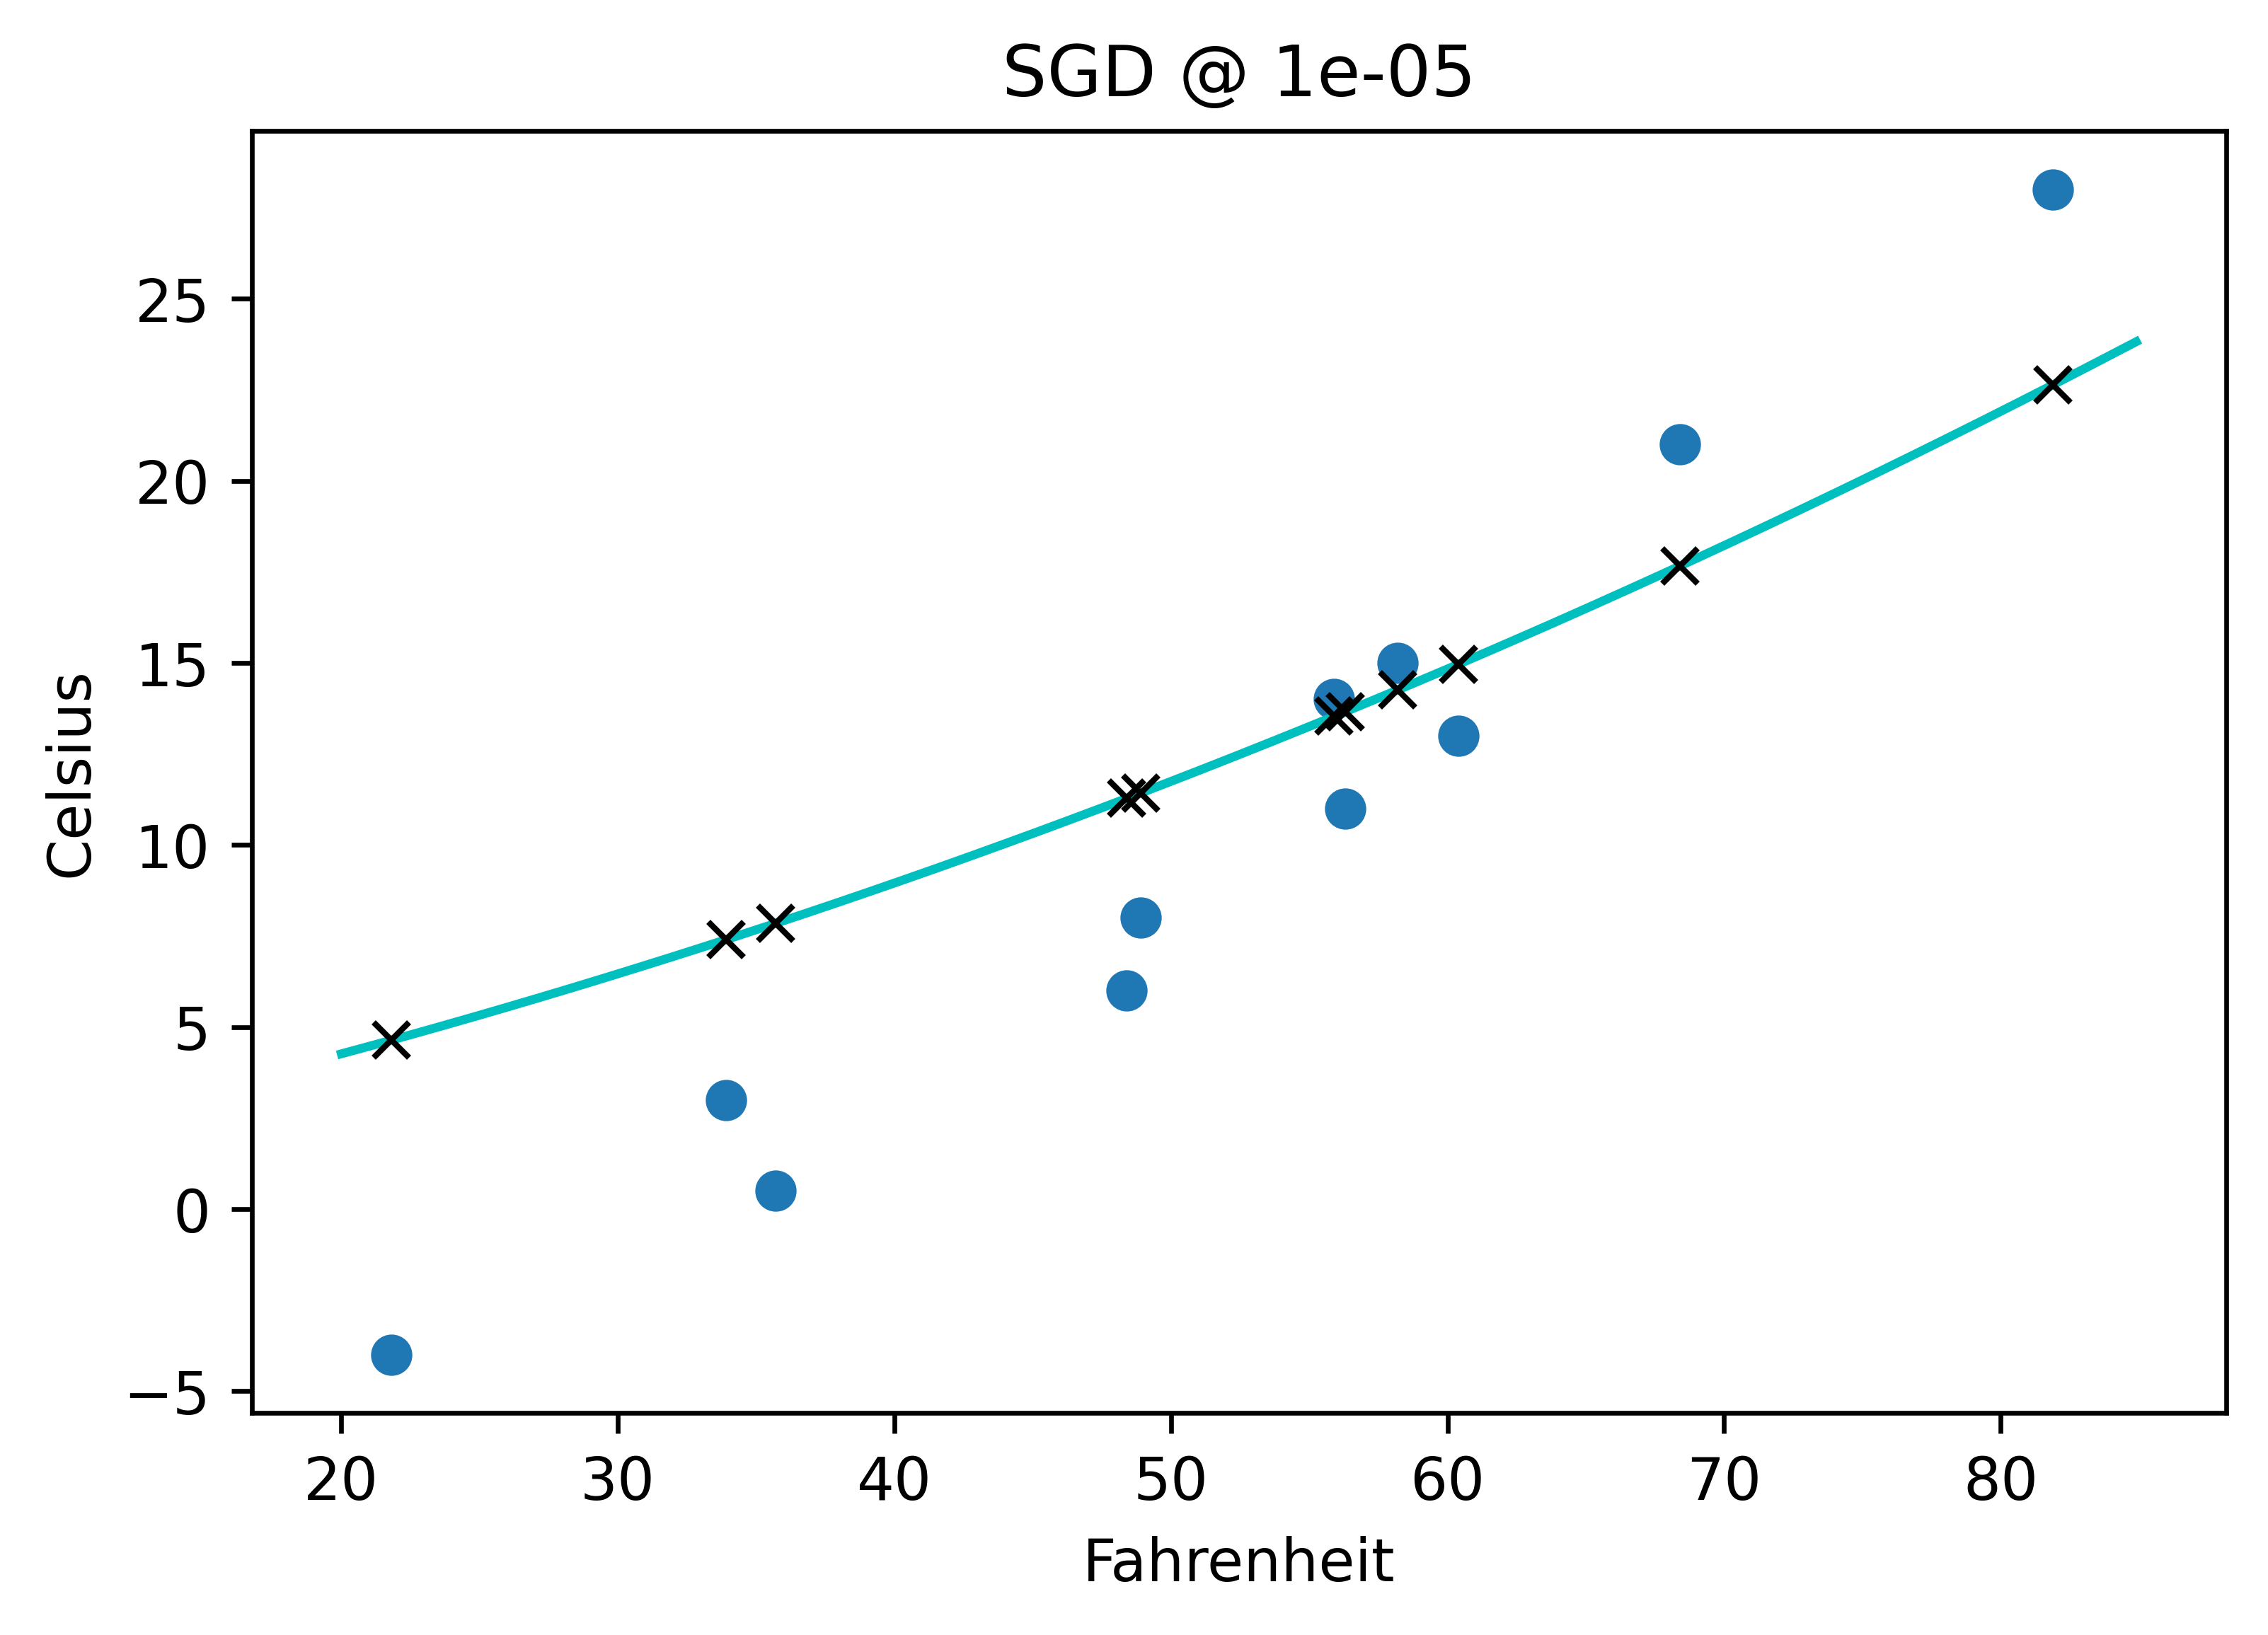

In [20]:
initial_paramaters = [0.05, 2, 1.0]

for rate in rates_to_learn_at:
    print(f"  Learning rate is {rate} :\n"+"/\\"*15)
    
    params = torch.tensor(initial_paramaters, requires_grad=True)
    optimizer = optim.SGD([params], lr=rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    
    print(f"Final Paramaters: {params}")
    
    if not (True in torch.isnan(params)):
        graph_temp(model, params, t_u, t_c, f"SGD @ {rate}")
    
    print('\n'+"--"*30+'\n')

Learning rate is 0.1 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss 2.312199354171753
    Epoch 1000, Loss 2.10111403465271
    Epoch 1500, Loss 2.1480979919433594
    Epoch 2000, Loss 2.090721607208252
    Epoch 2500, Loss 2.0907201766967773
    Epoch 3000, Loss 2.0907304286956787
    Epoch 3500, Loss 2.0907211303710938
    Epoch 4000, Loss 2.090721368789673
    Epoch 4500, Loss 2.0907208919525146
    Epoch 5000, Loss 2.0907206535339355
Final Paramaters: tensor([  0.2830,   2.4760, -10.6496], requires_grad=True)

------------------------------------------------------------

Learning rate is 0.01 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss 3.327059030532837
    Epoch 1000, Loss 3.095790147781372
    Epoch 1500, Loss 2.9226744174957275
    Epoch 2000, Loss 2.7324252128601074
    Epoch 2500, Loss 2.5455126762390137
    Epoch 3000, Loss 2.381275177001953
    Epoch 3500, Loss 2.2538294792175293
    Epoch 4000, Loss 2.168503522872925
    Epoch 4500, Loss 2.1208672523498535
  

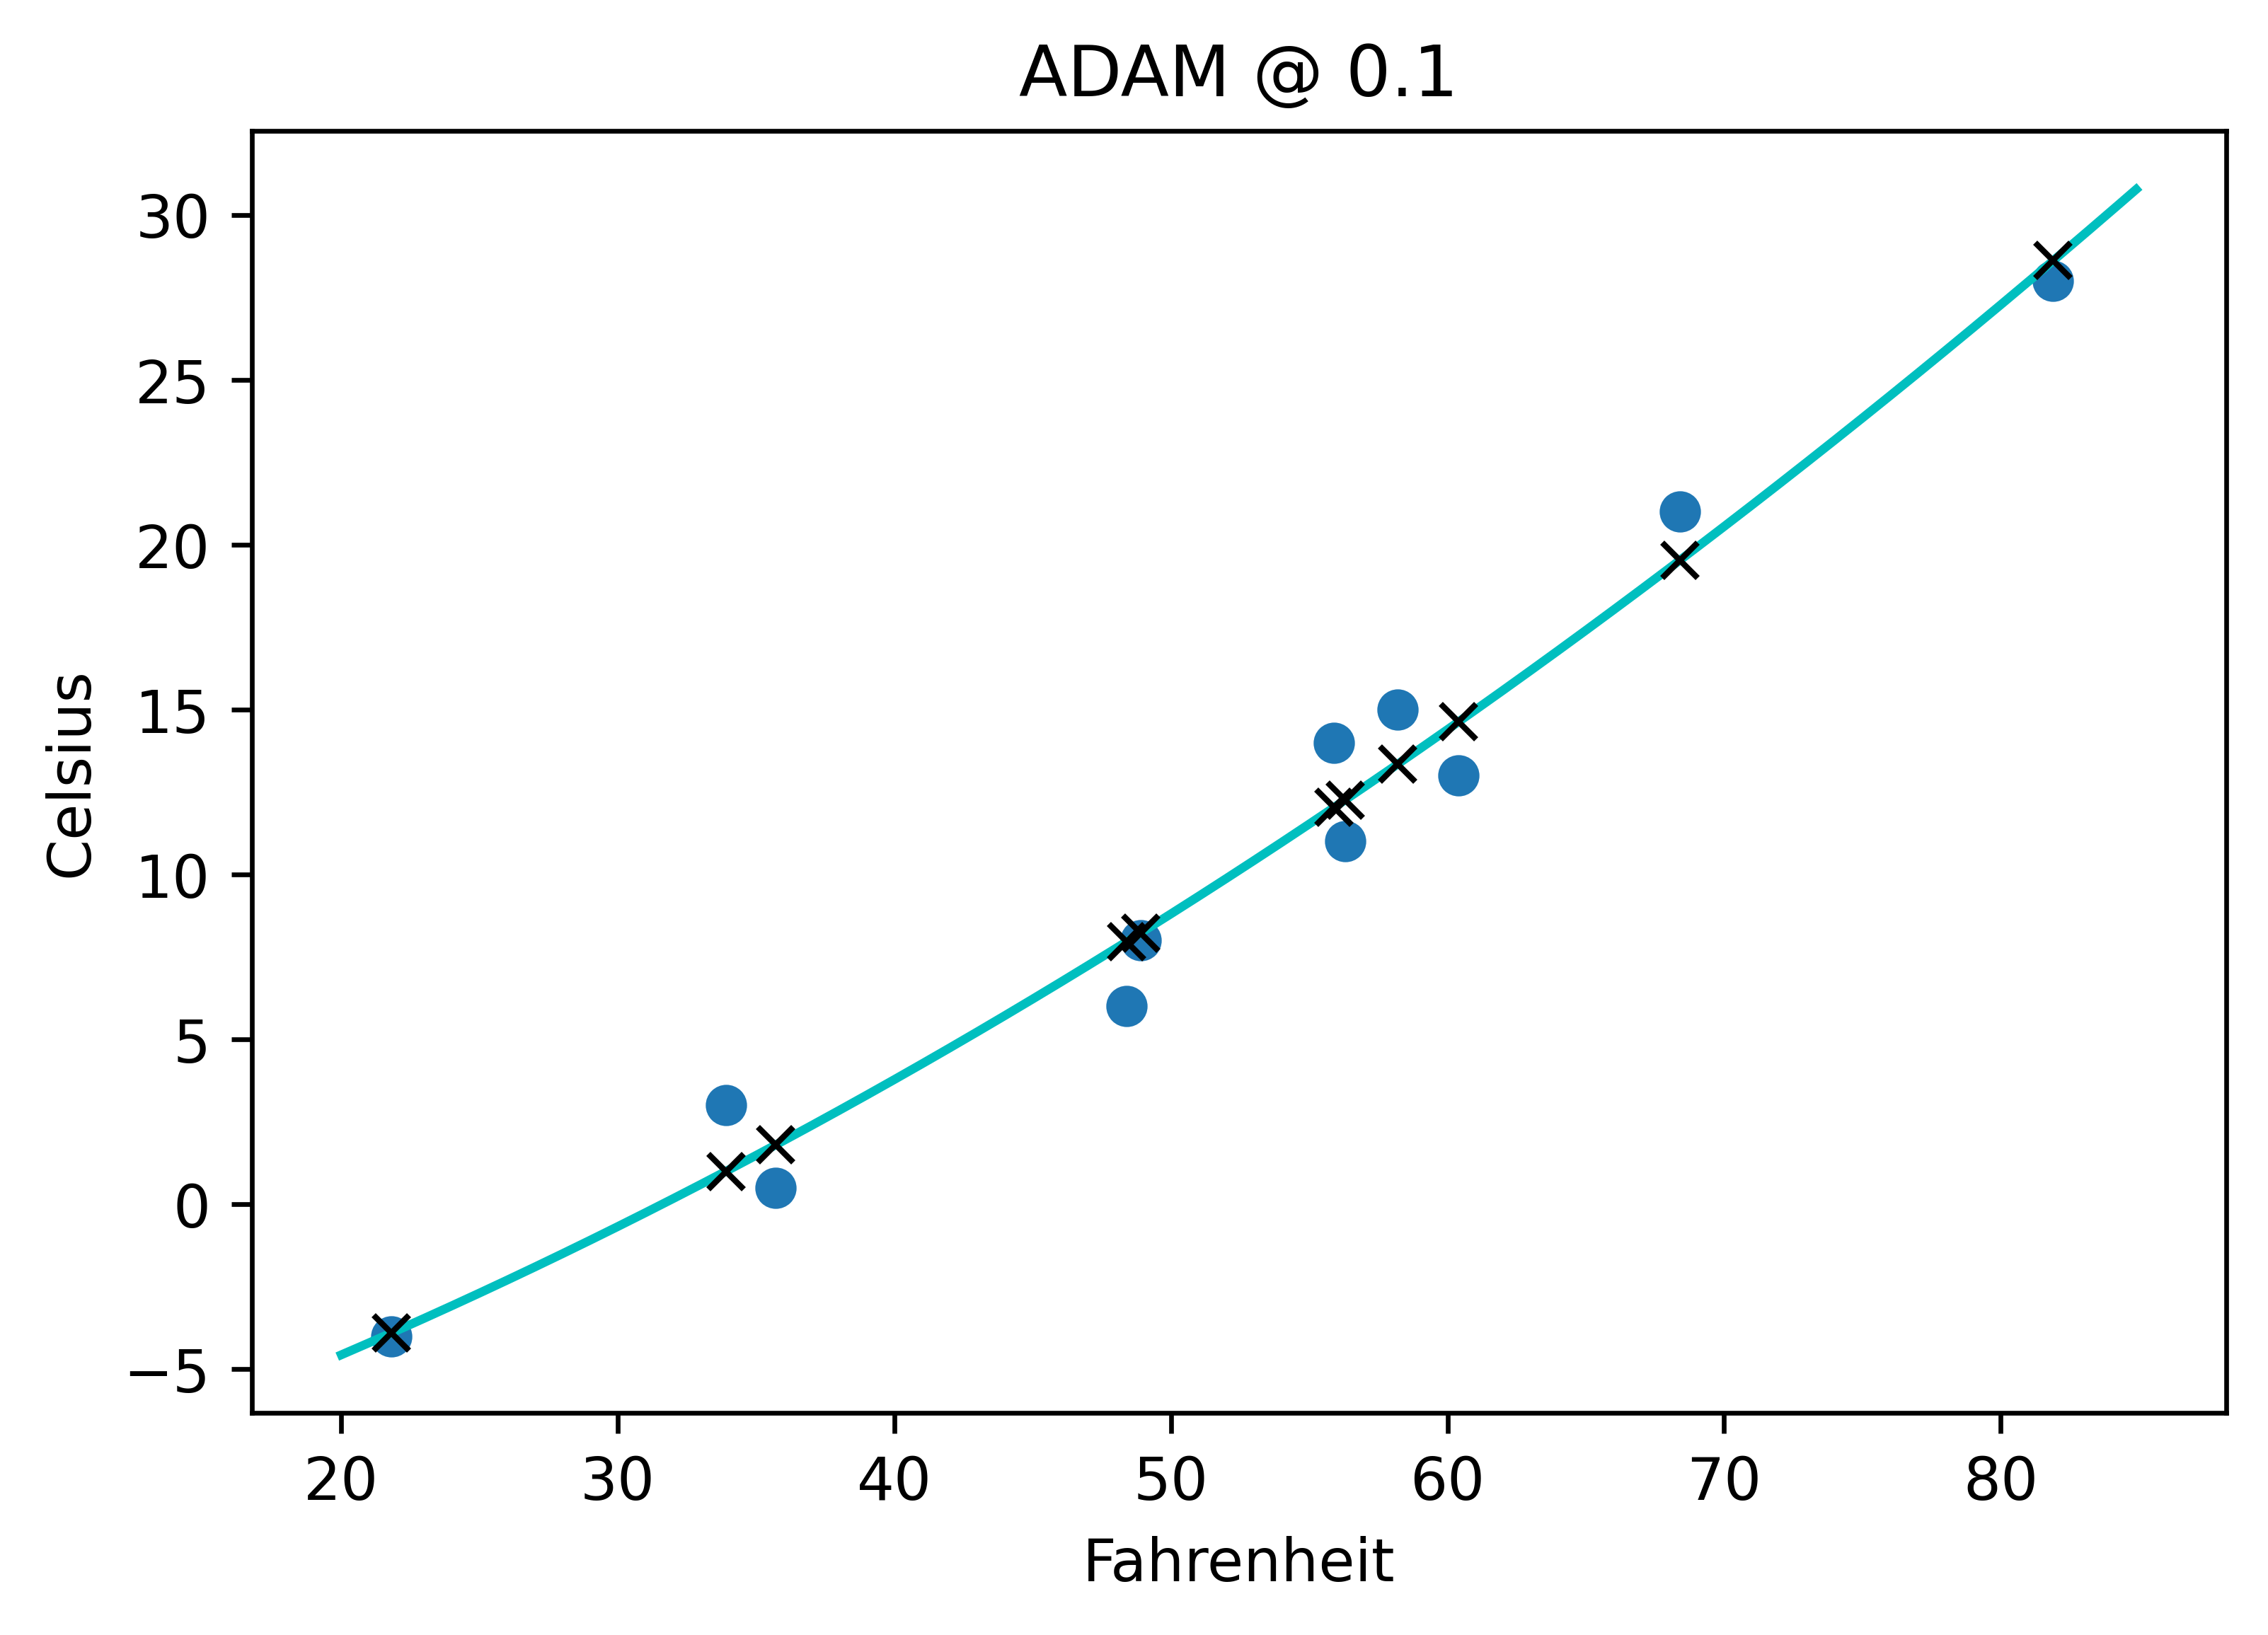

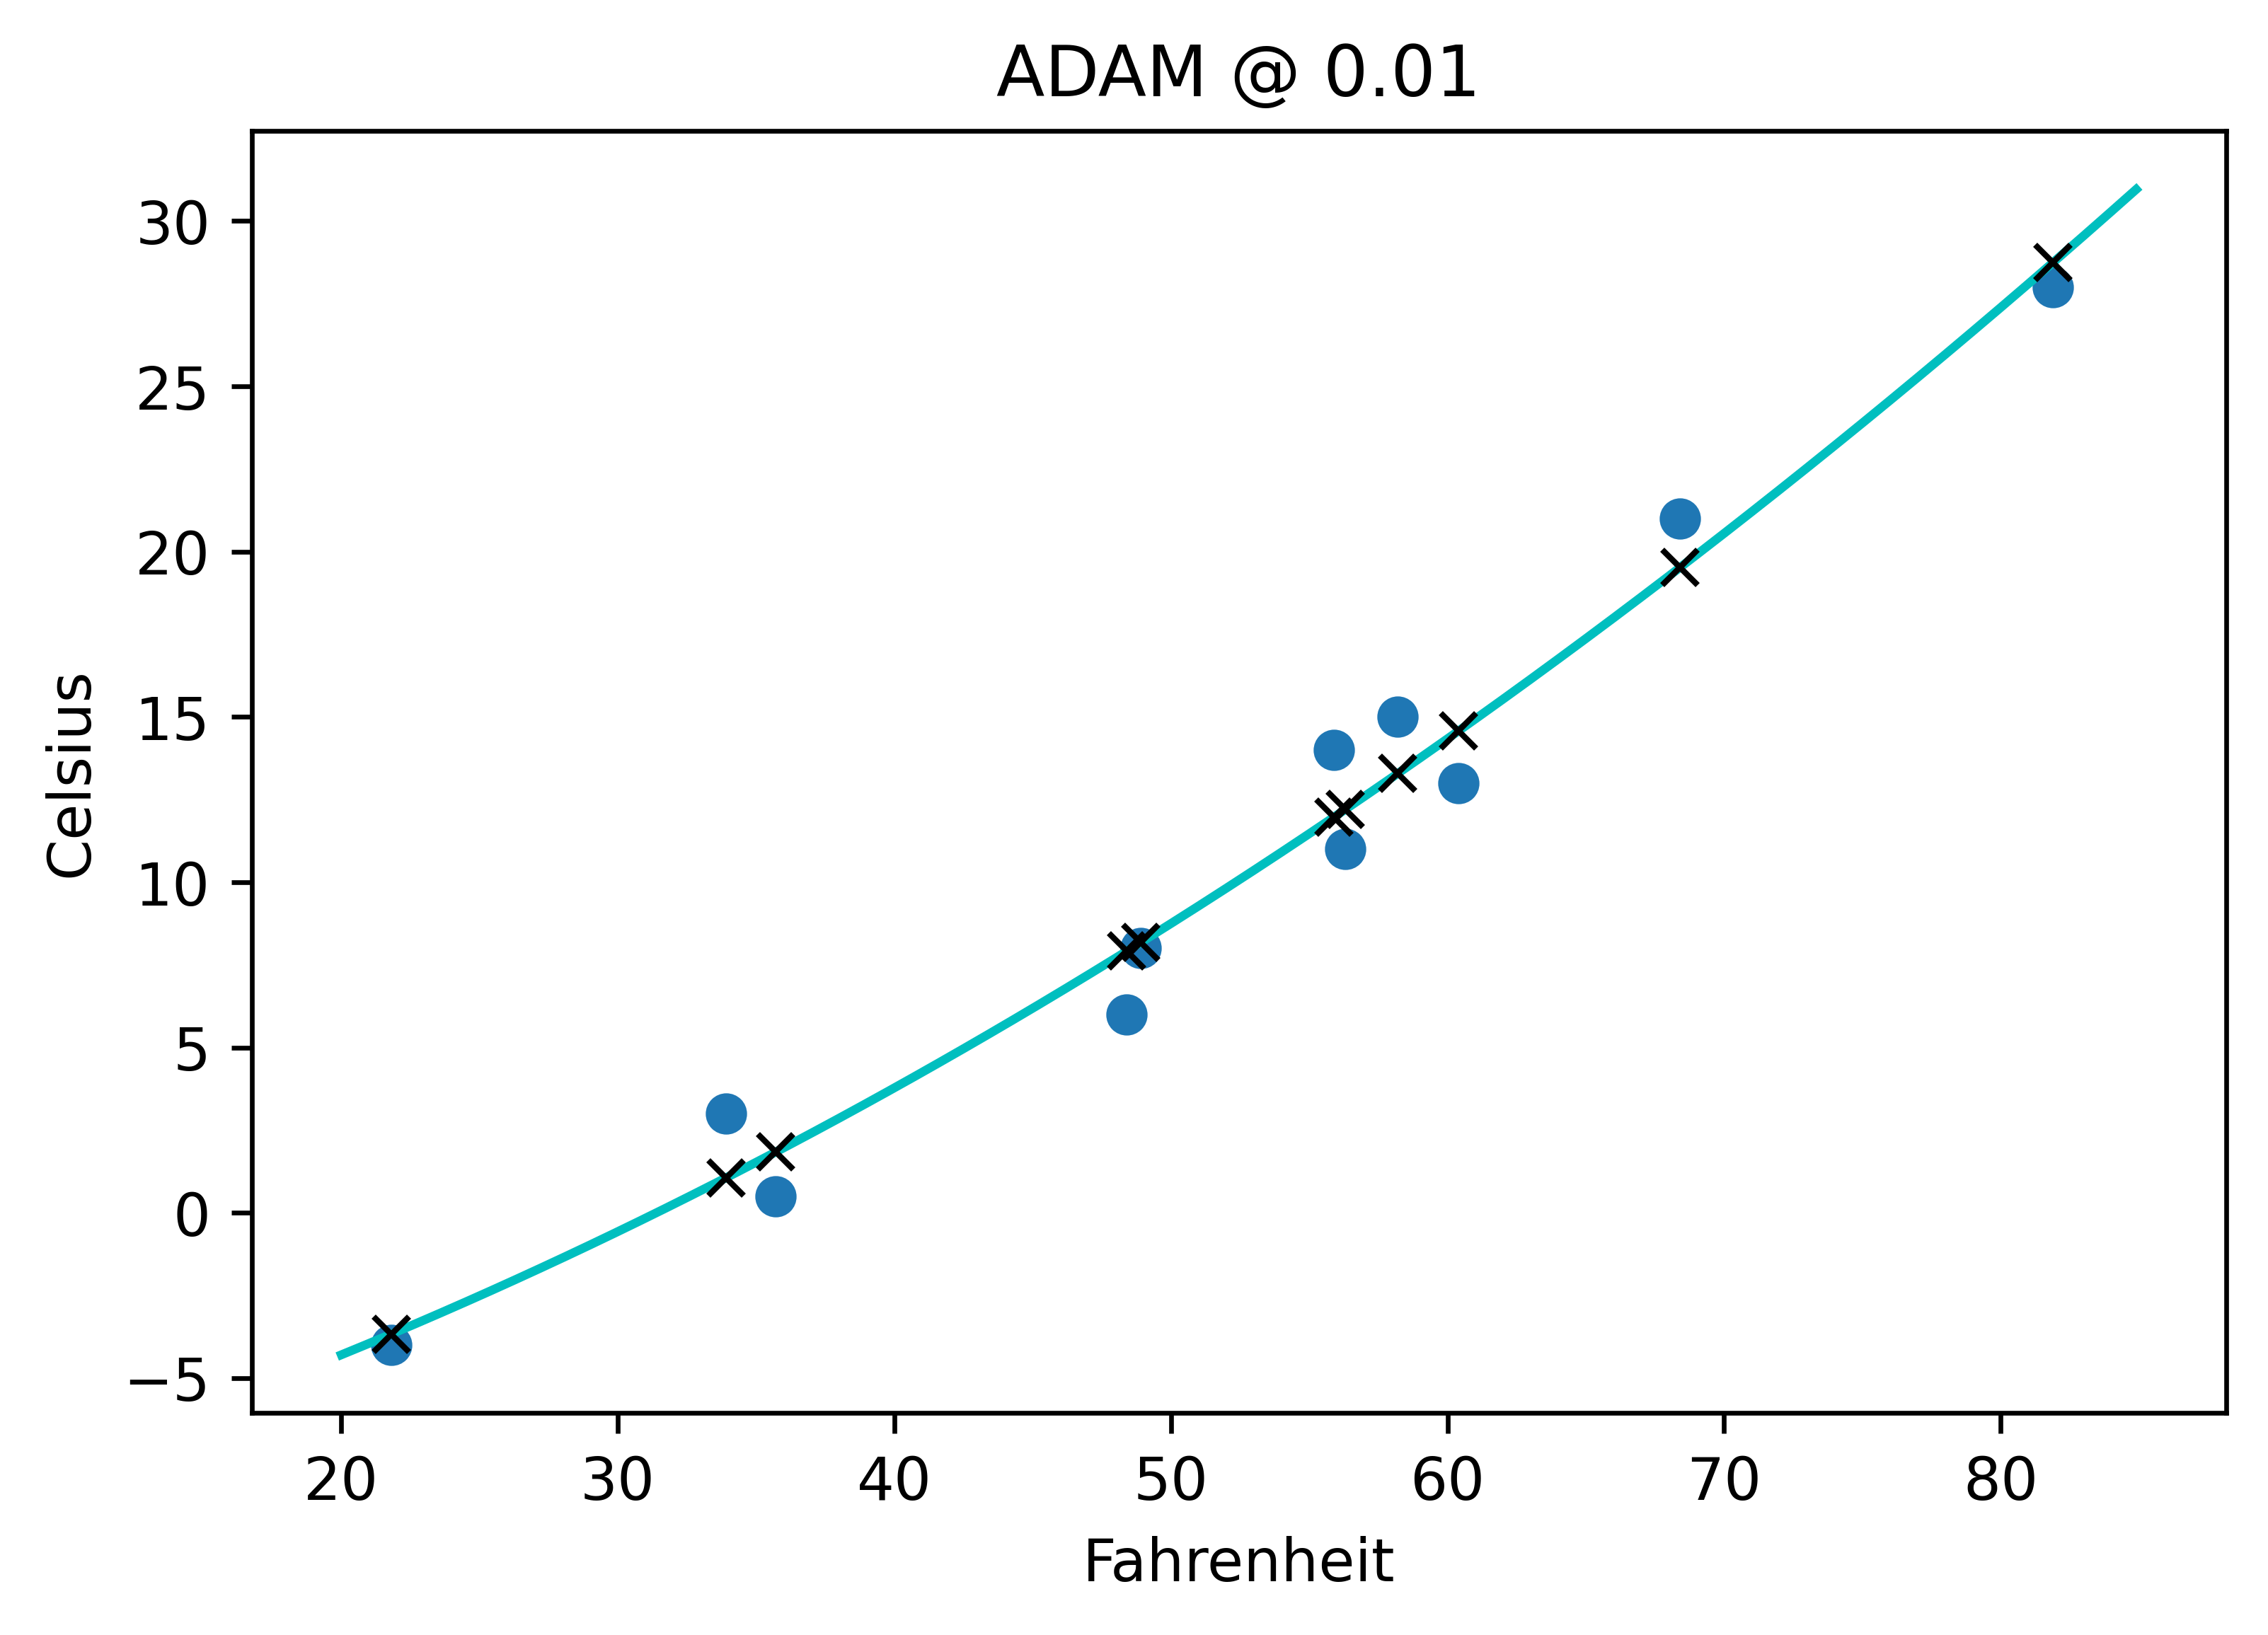

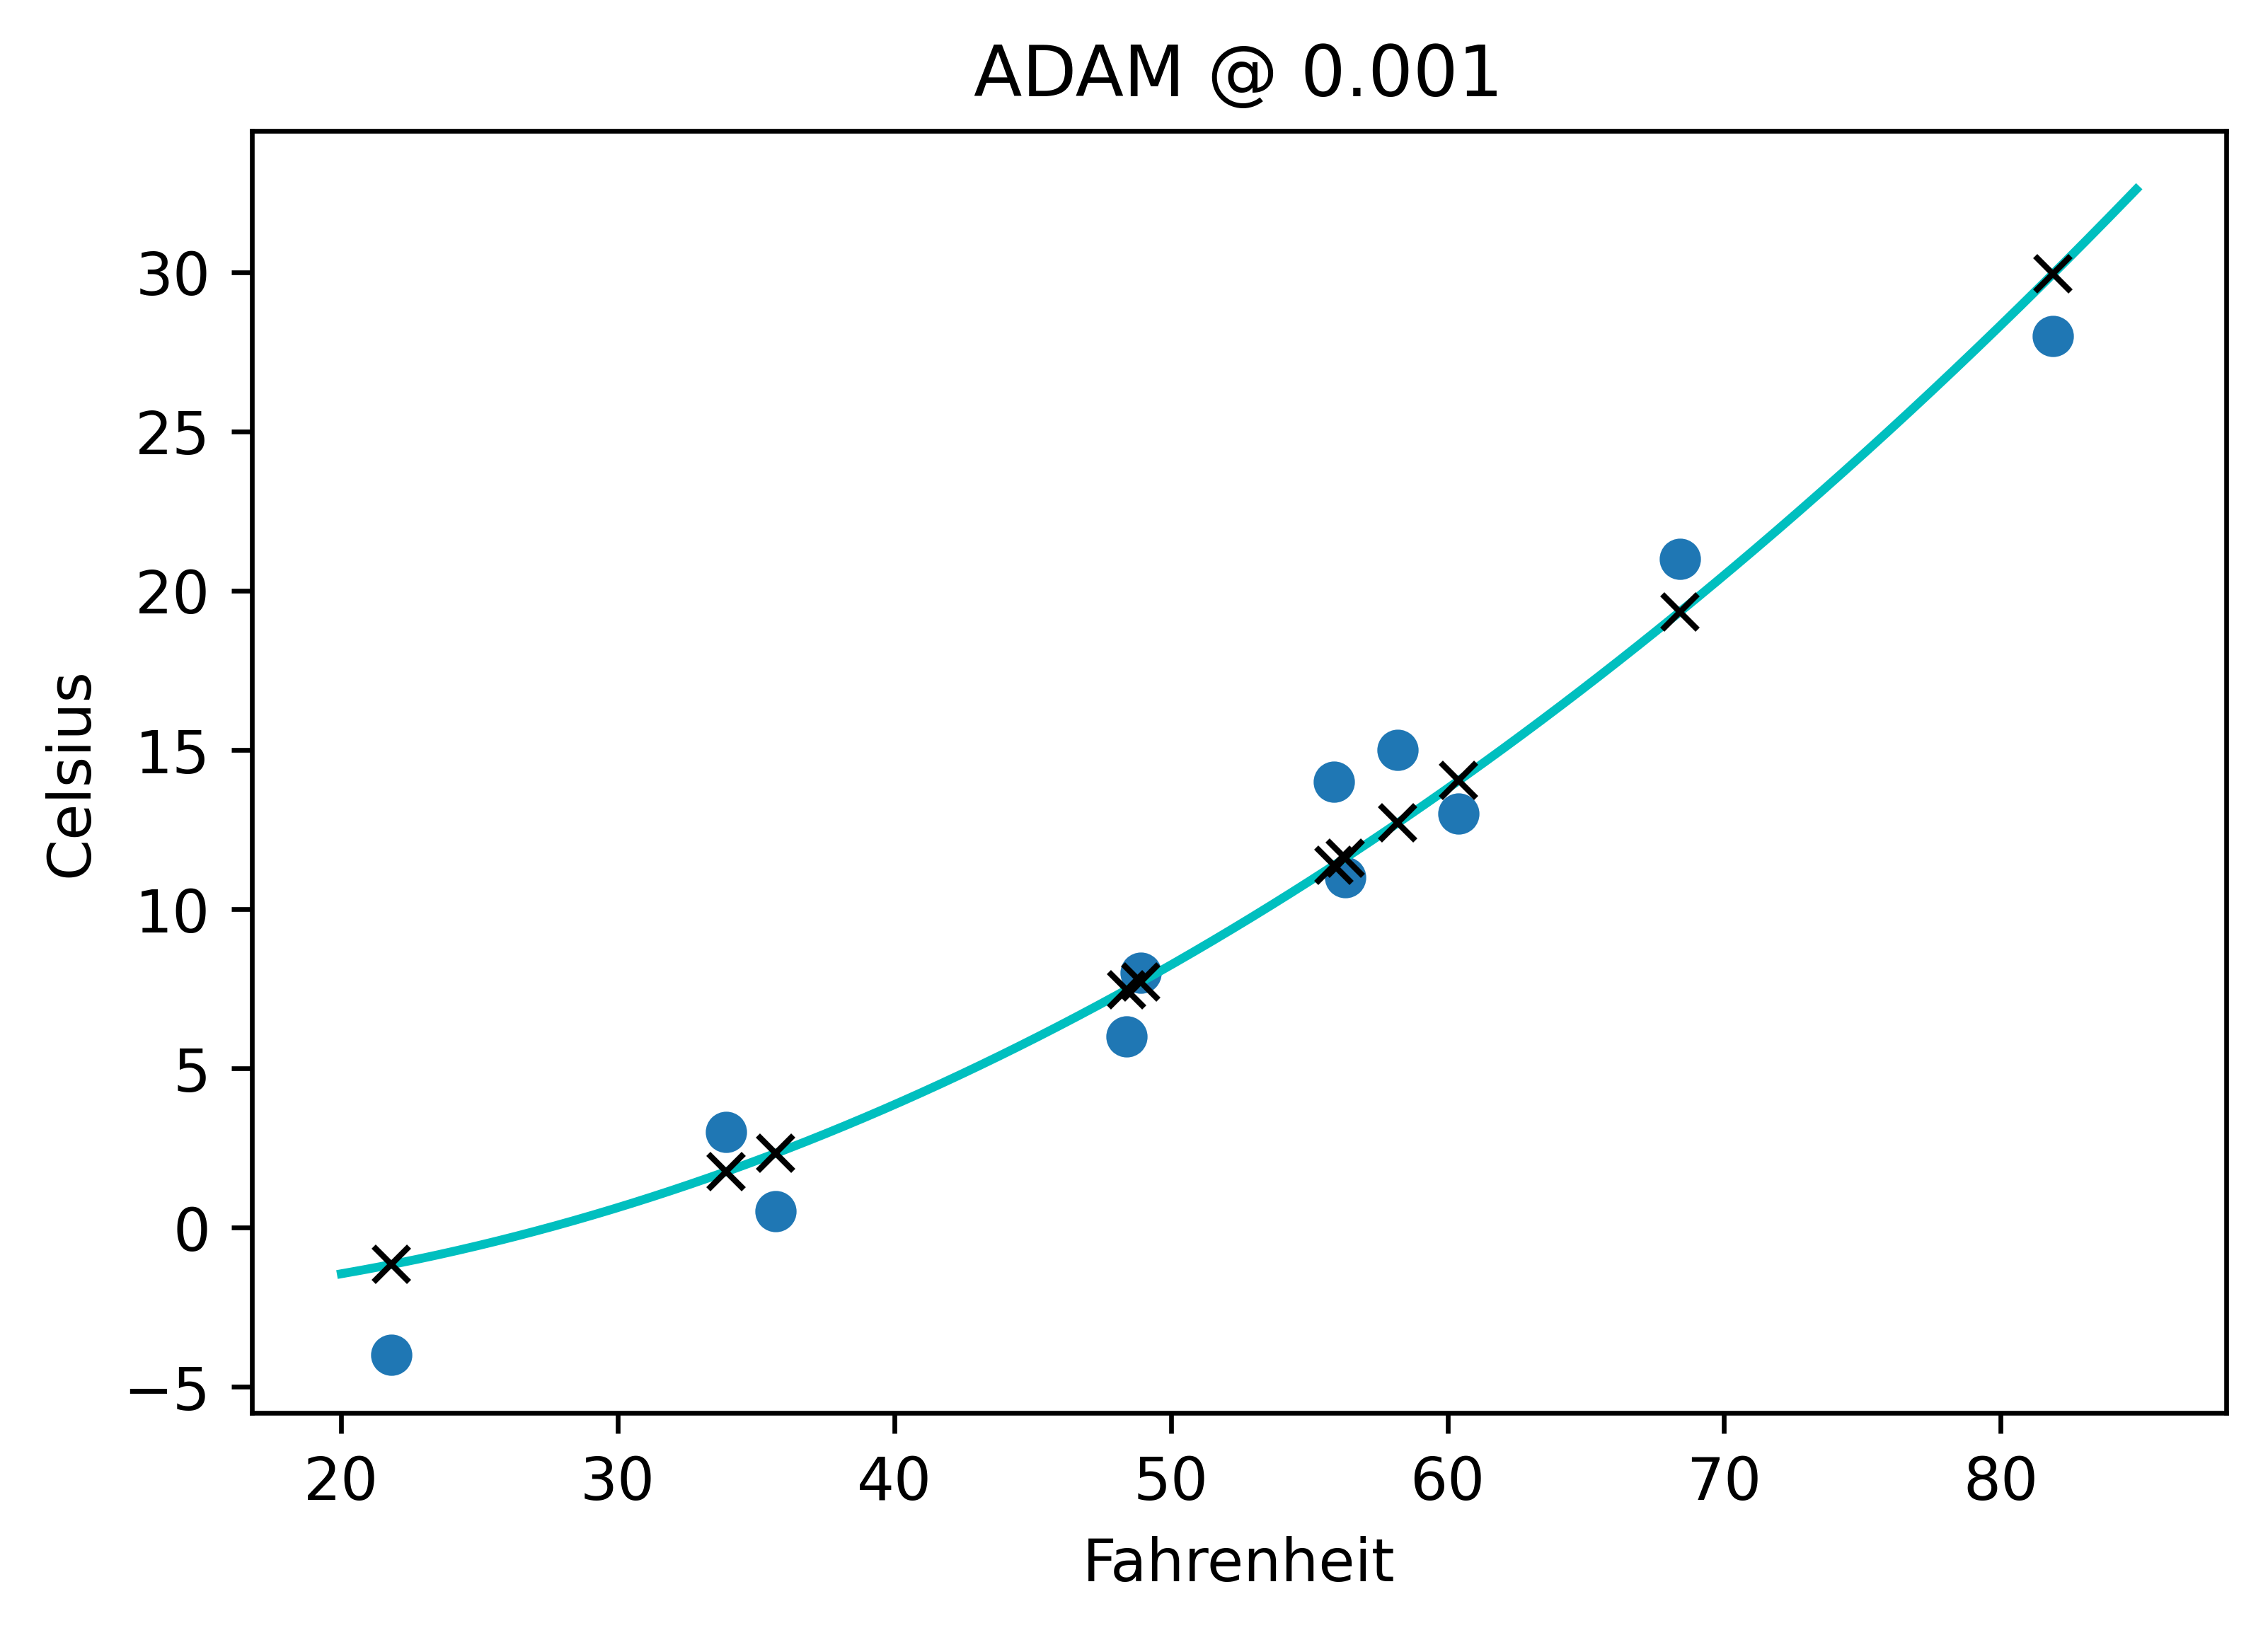

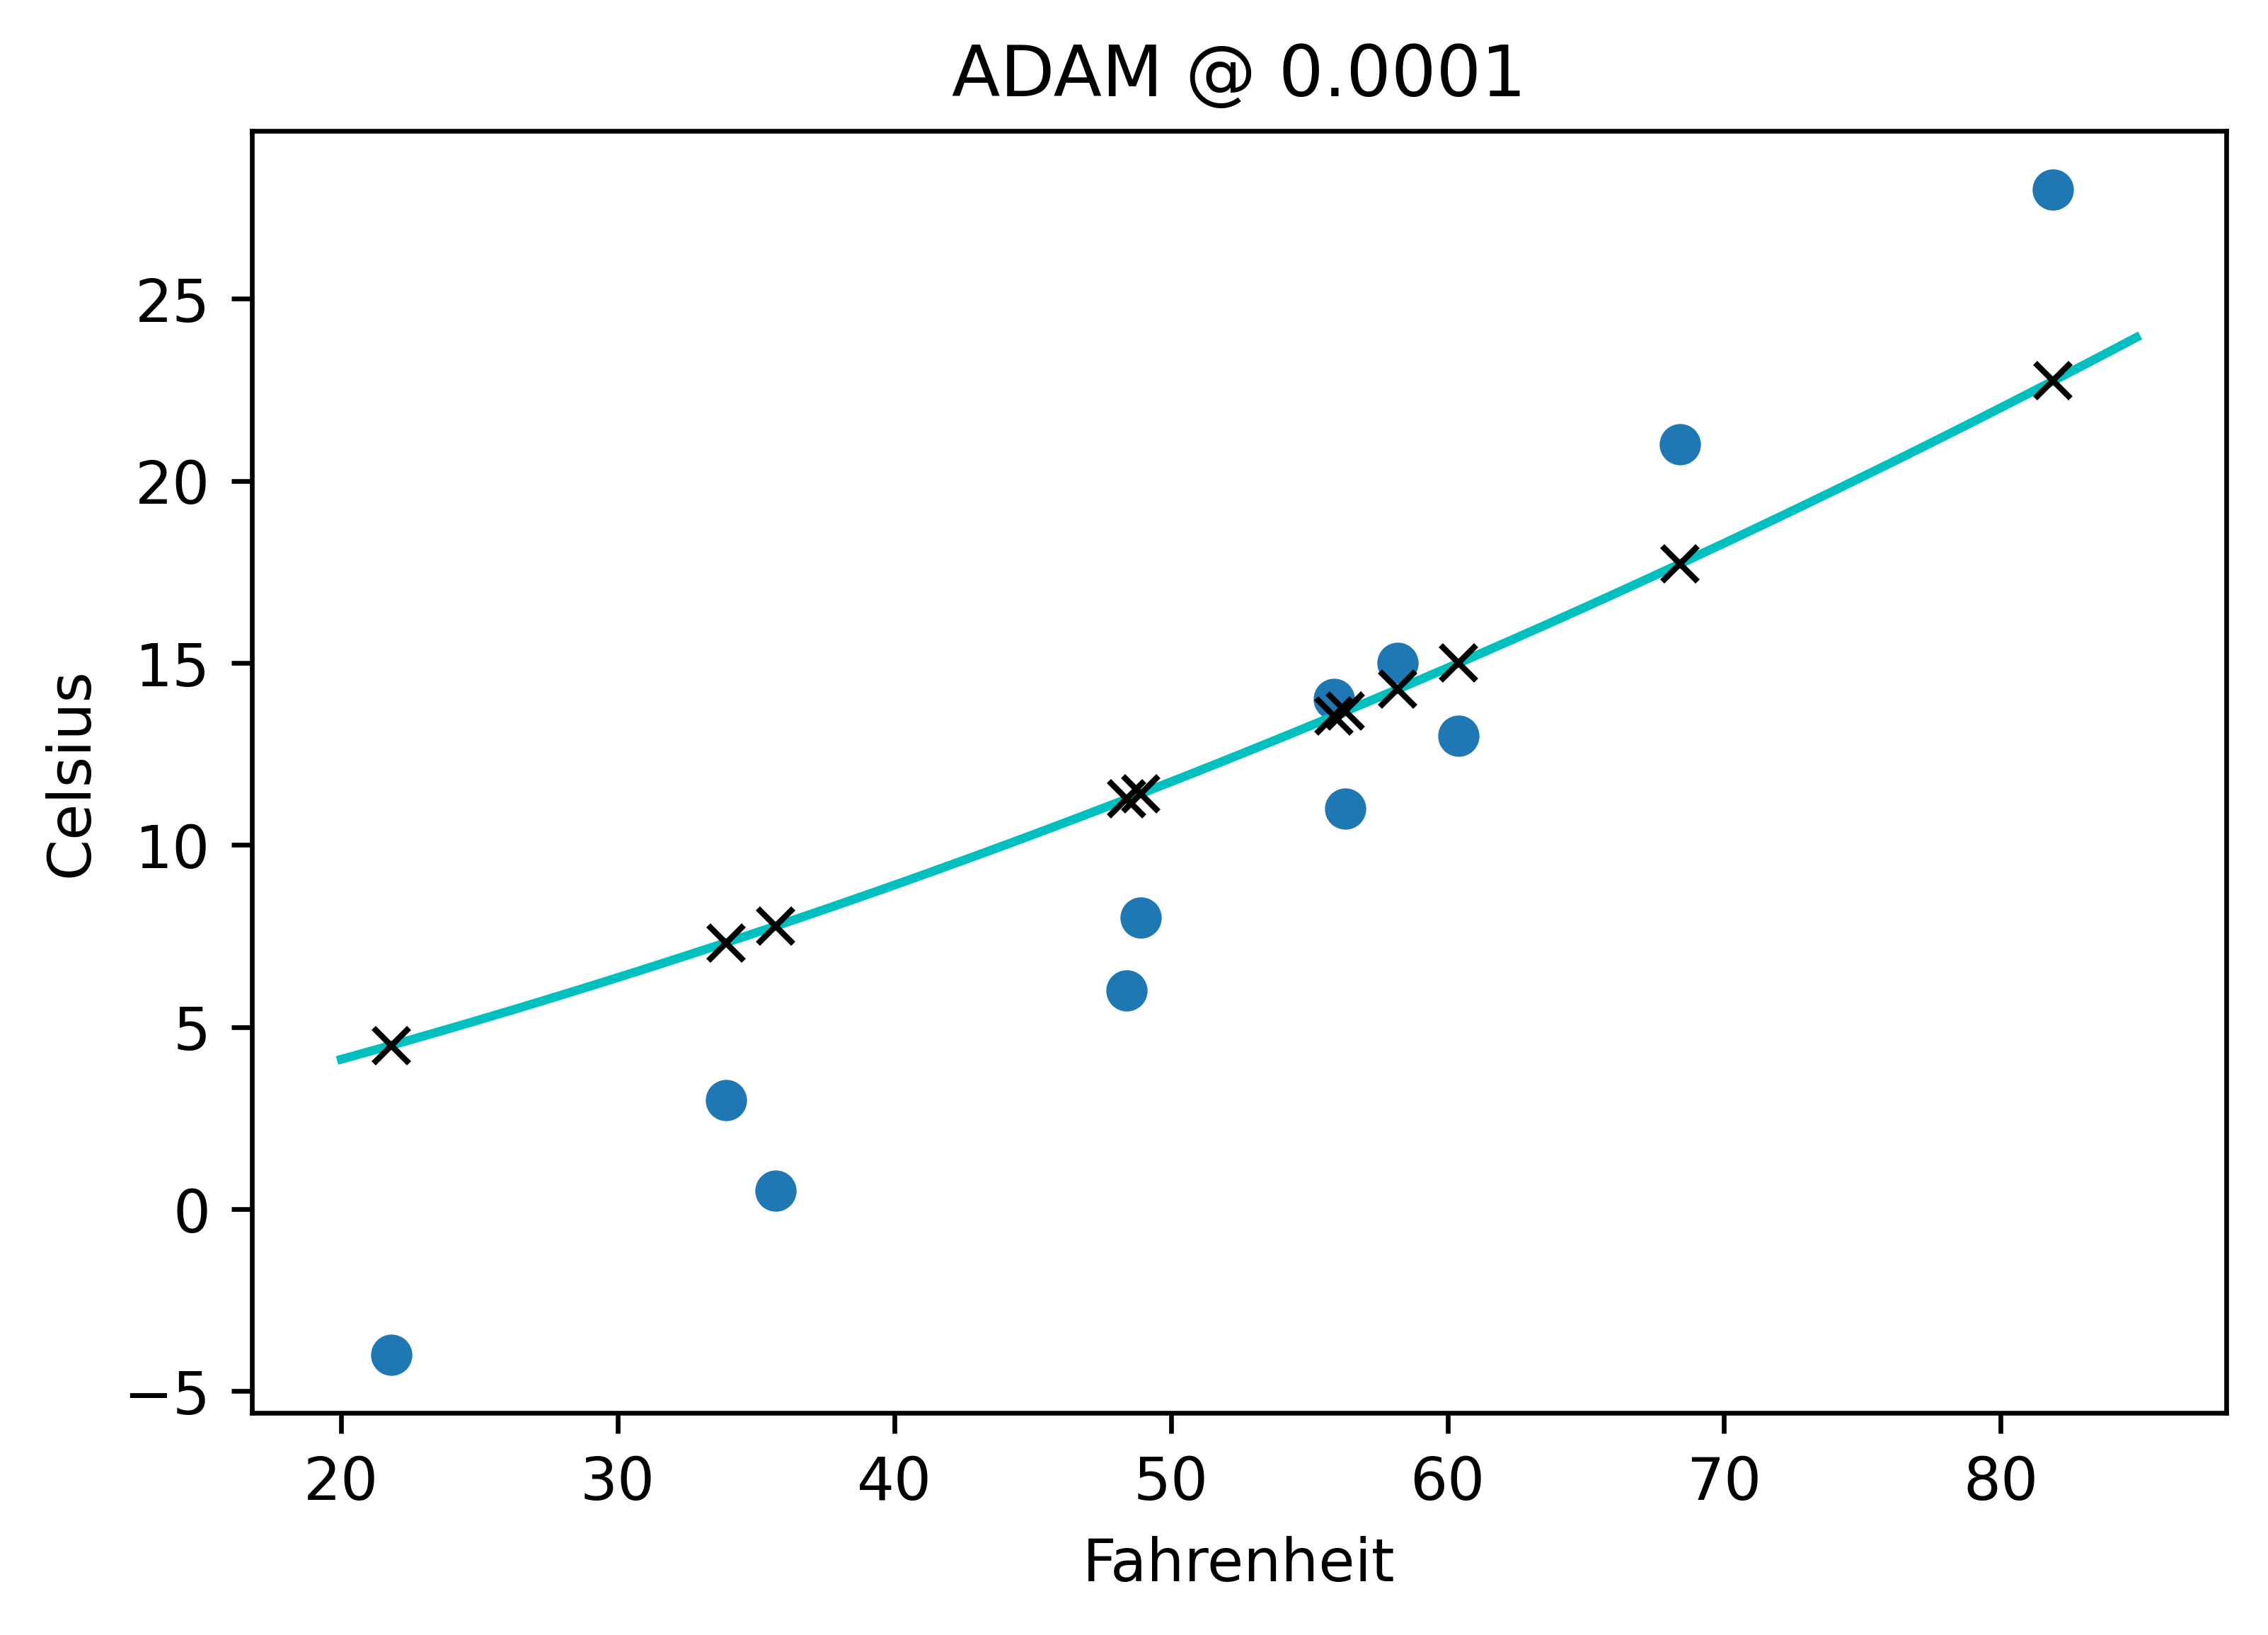

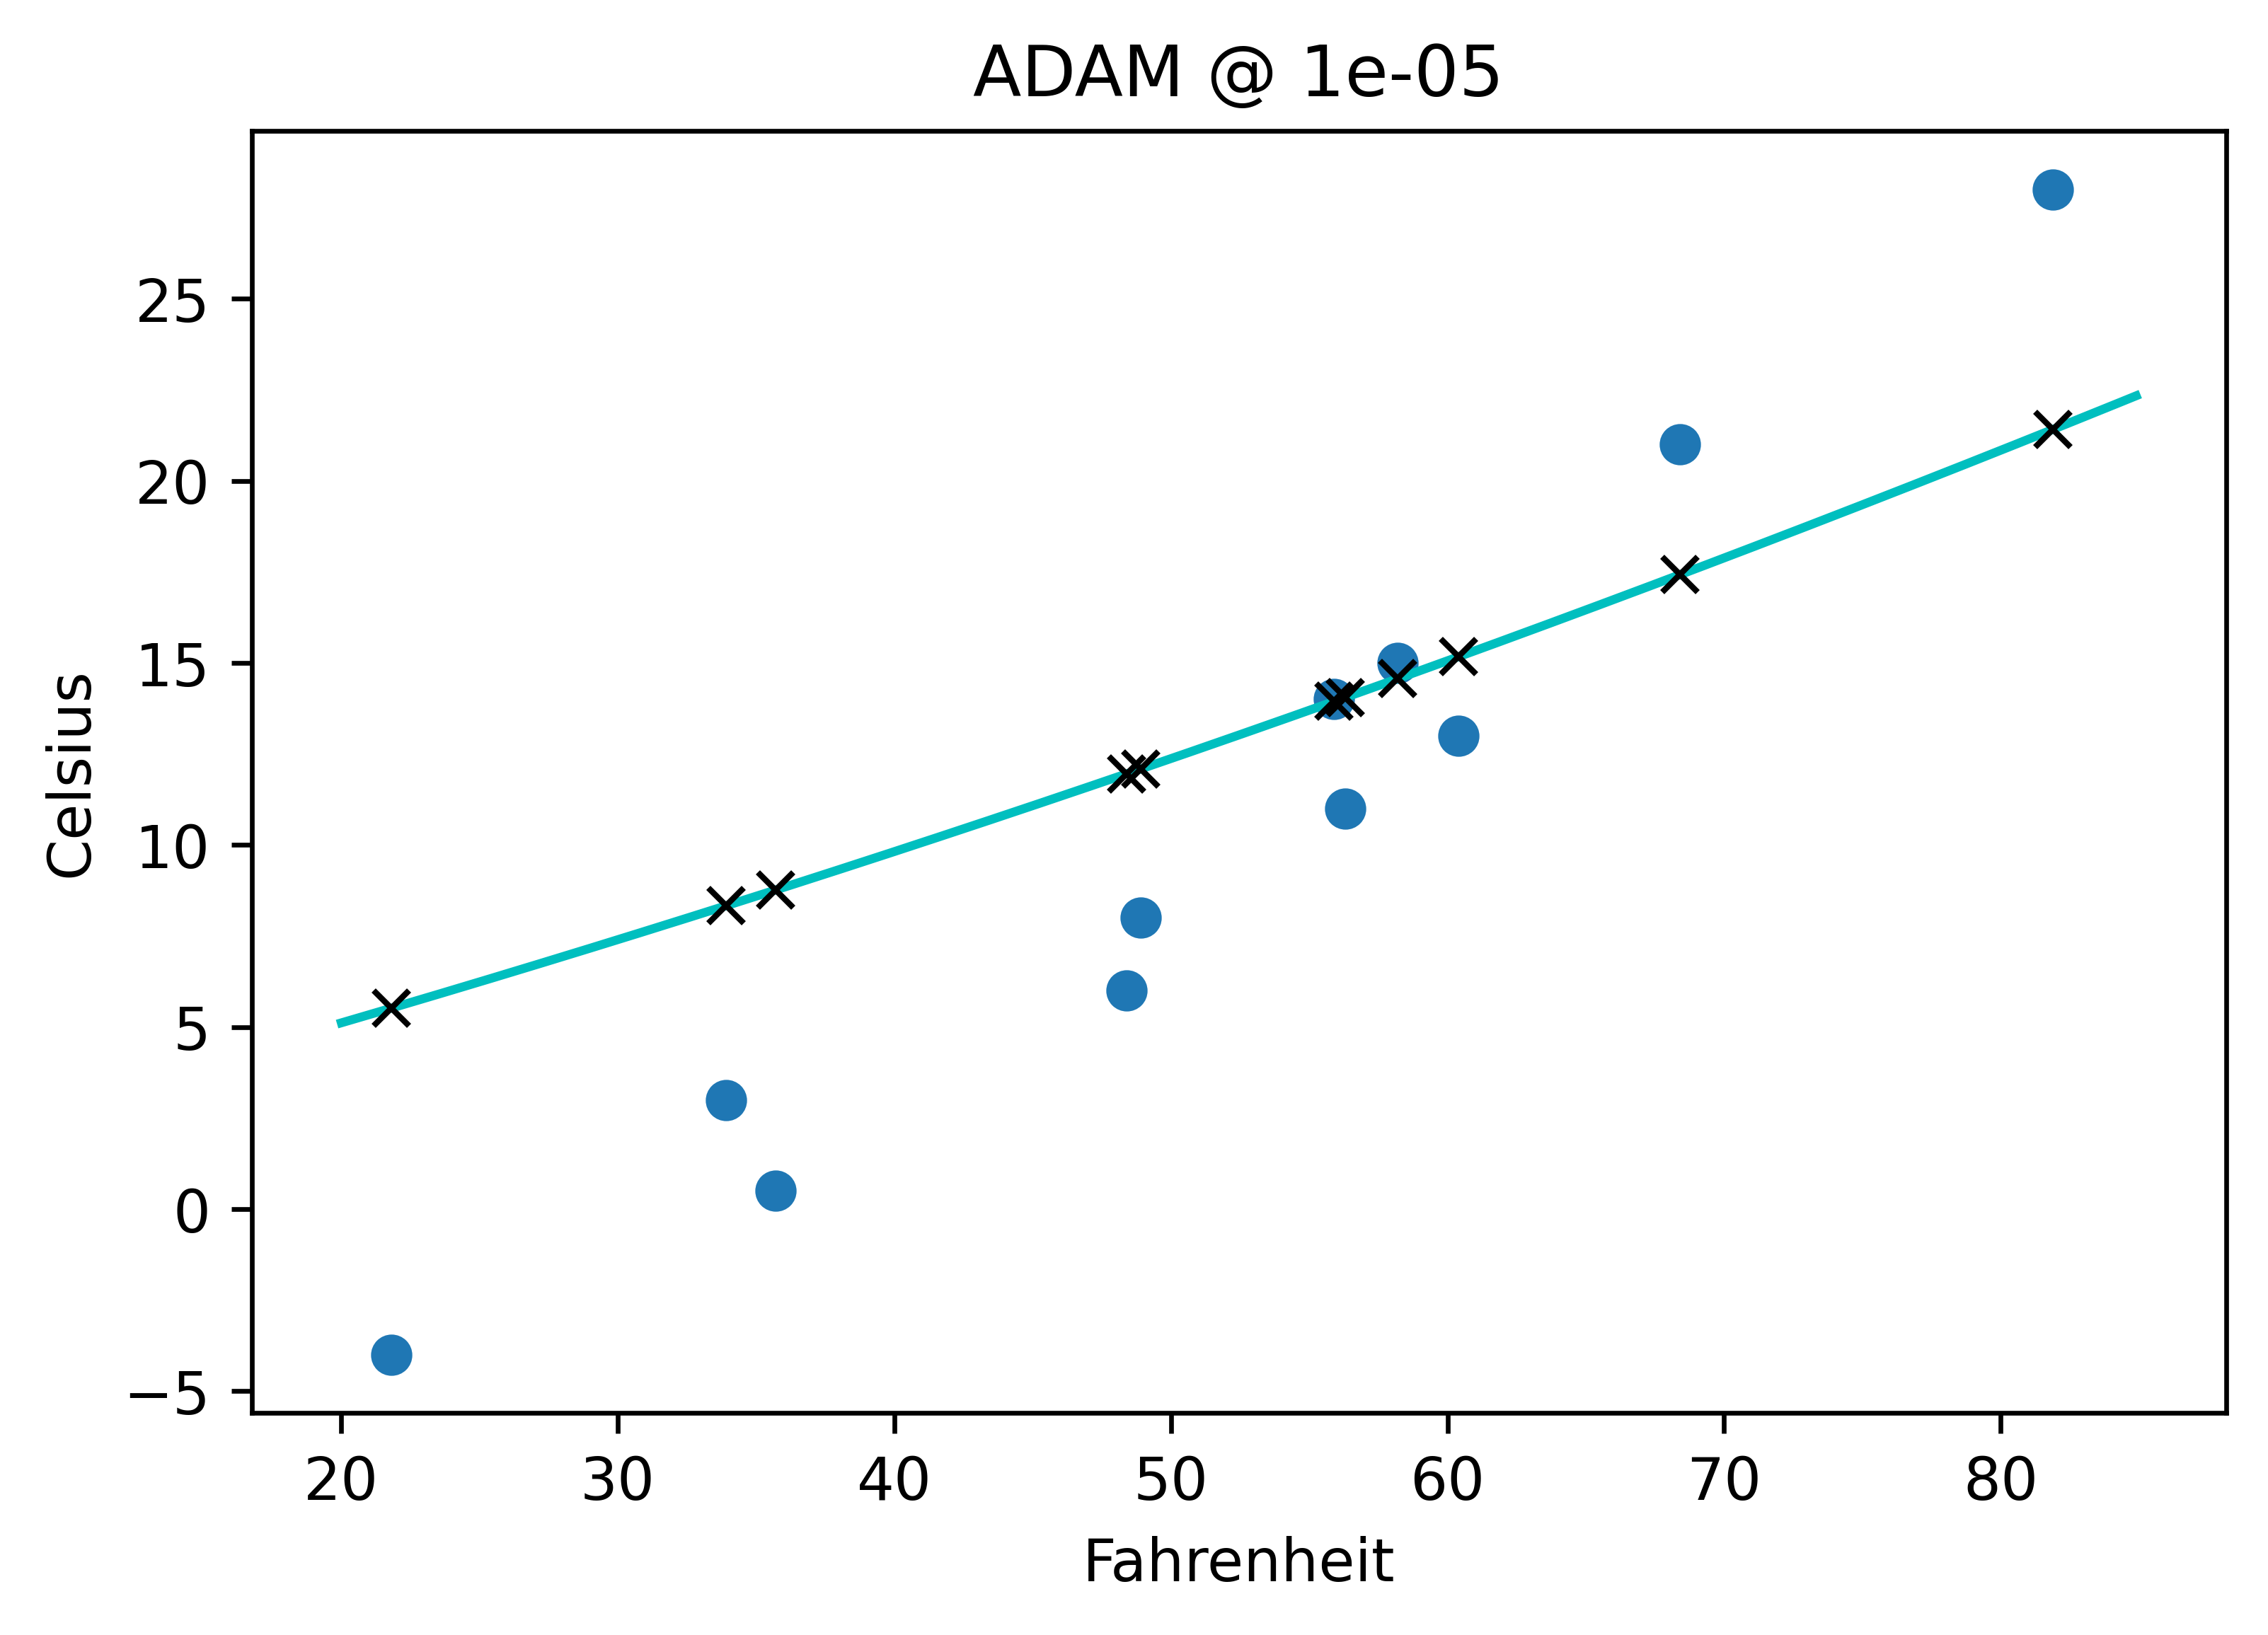

In [21]:
for rate in rates_to_learn_at:
    print(f"Learning rate is {rate} :\n"+"/\\"*15)
    
    params = torch.tensor(initial_paramaters, requires_grad=True)
    learning_rate = rate
    optimizer = optim.Adam([params], lr=learning_rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    
    print(f"Final Paramaters: {params}")
    
    if not (True in torch.isnan(params)):
        graph_temp(model, params, t_u, t_c, f"ADAM @ {rate}")
    
    print('\n'+"--"*30+'\n')

Learning rate is 0.1 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss 3.5323750972747803
    Epoch 1000, Loss 3.153088331222534
    Epoch 1500, Loss 3.0957770347595215
    Epoch 2000, Loss 3.0496177673339844
    Epoch 2500, Loss 3.0059127807617188
    Epoch 3000, Loss 2.9643051624298096
    Epoch 3500, Loss 2.9246842861175537
    Epoch 4000, Loss 2.8869407176971436
    Epoch 4500, Loss 2.850983142852783
    Epoch 5000, Loss 2.816714286804199
Final Paramaters: tensor([ 0.5288, -0.2203, -3.8306], requires_grad=True)

------------------------------------------------------------

Learning rate is 0.01 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss 22.189430236816406
    Epoch 1000, Loss 19.695493698120117
    Epoch 1500, Loss 17.944202423095703
    Epoch 2000, Loss 16.573047637939453
    Epoch 2500, Loss 15.442191123962402
    Epoch 3000, Loss 14.480133056640625
    Epoch 3500, Loss 13.64453411102295
    Epoch 4000, Loss 12.907891273498535
    Epoch 4500, Loss 12.251148223876953


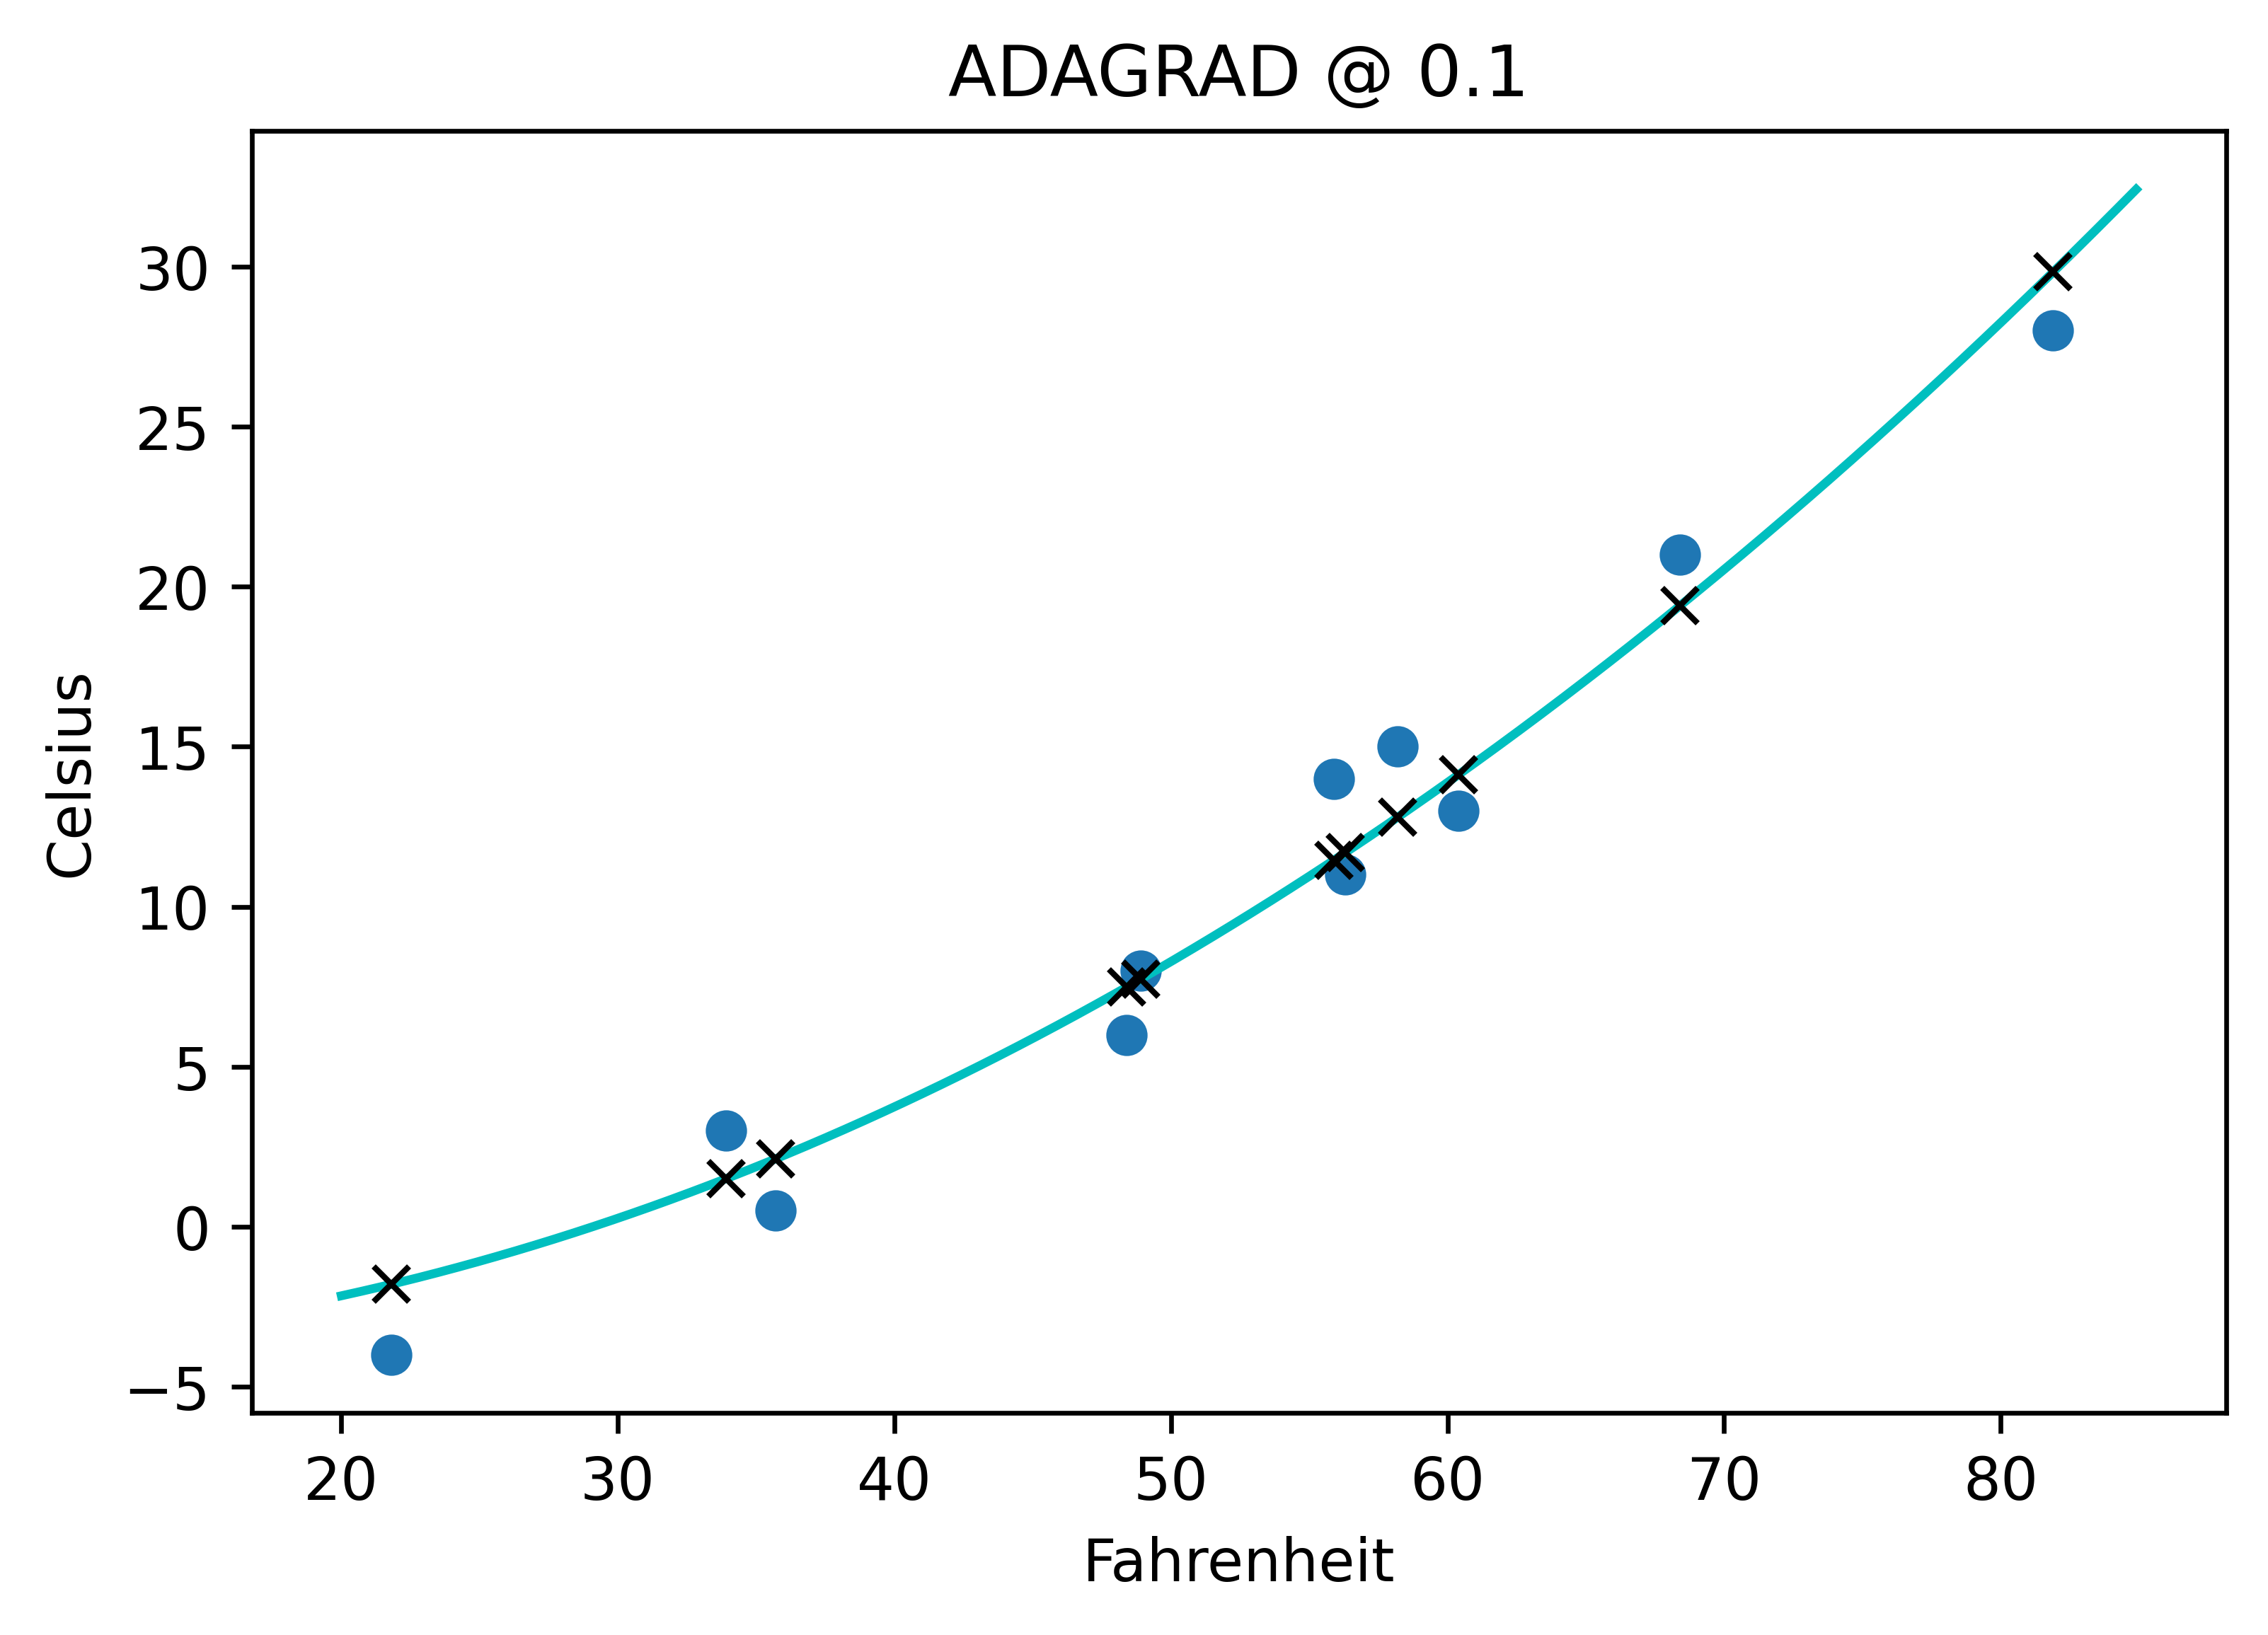

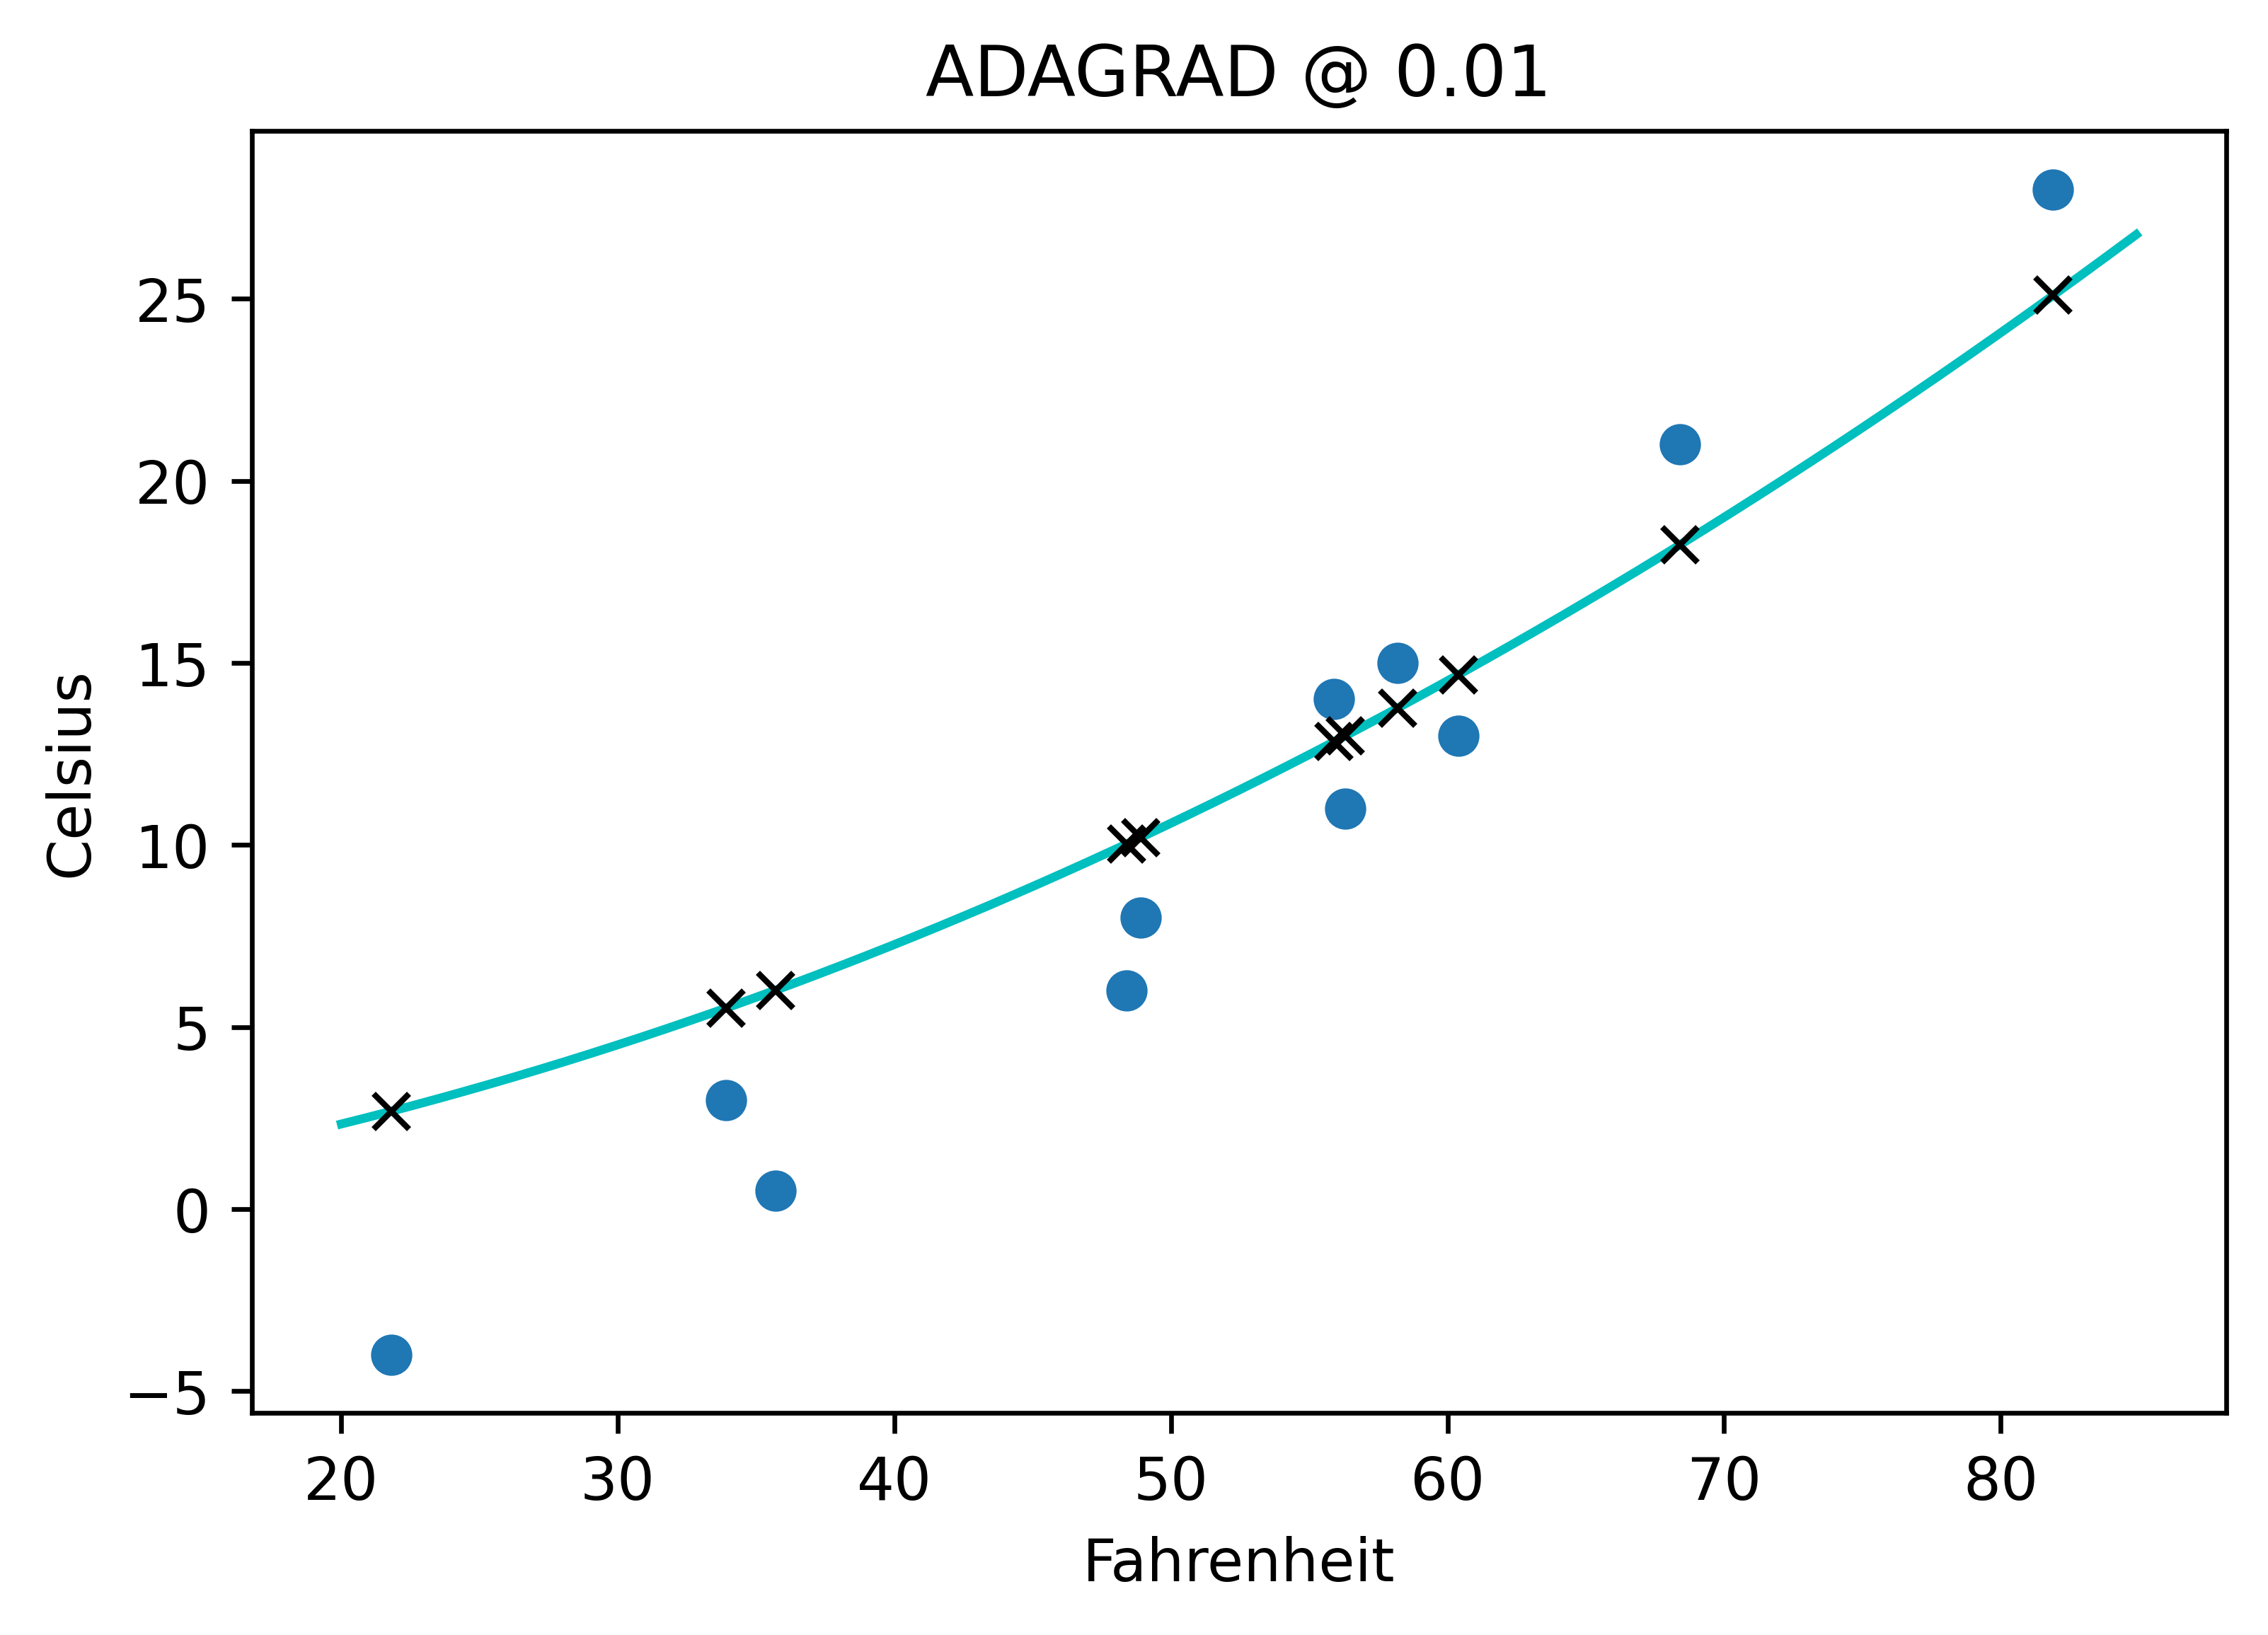

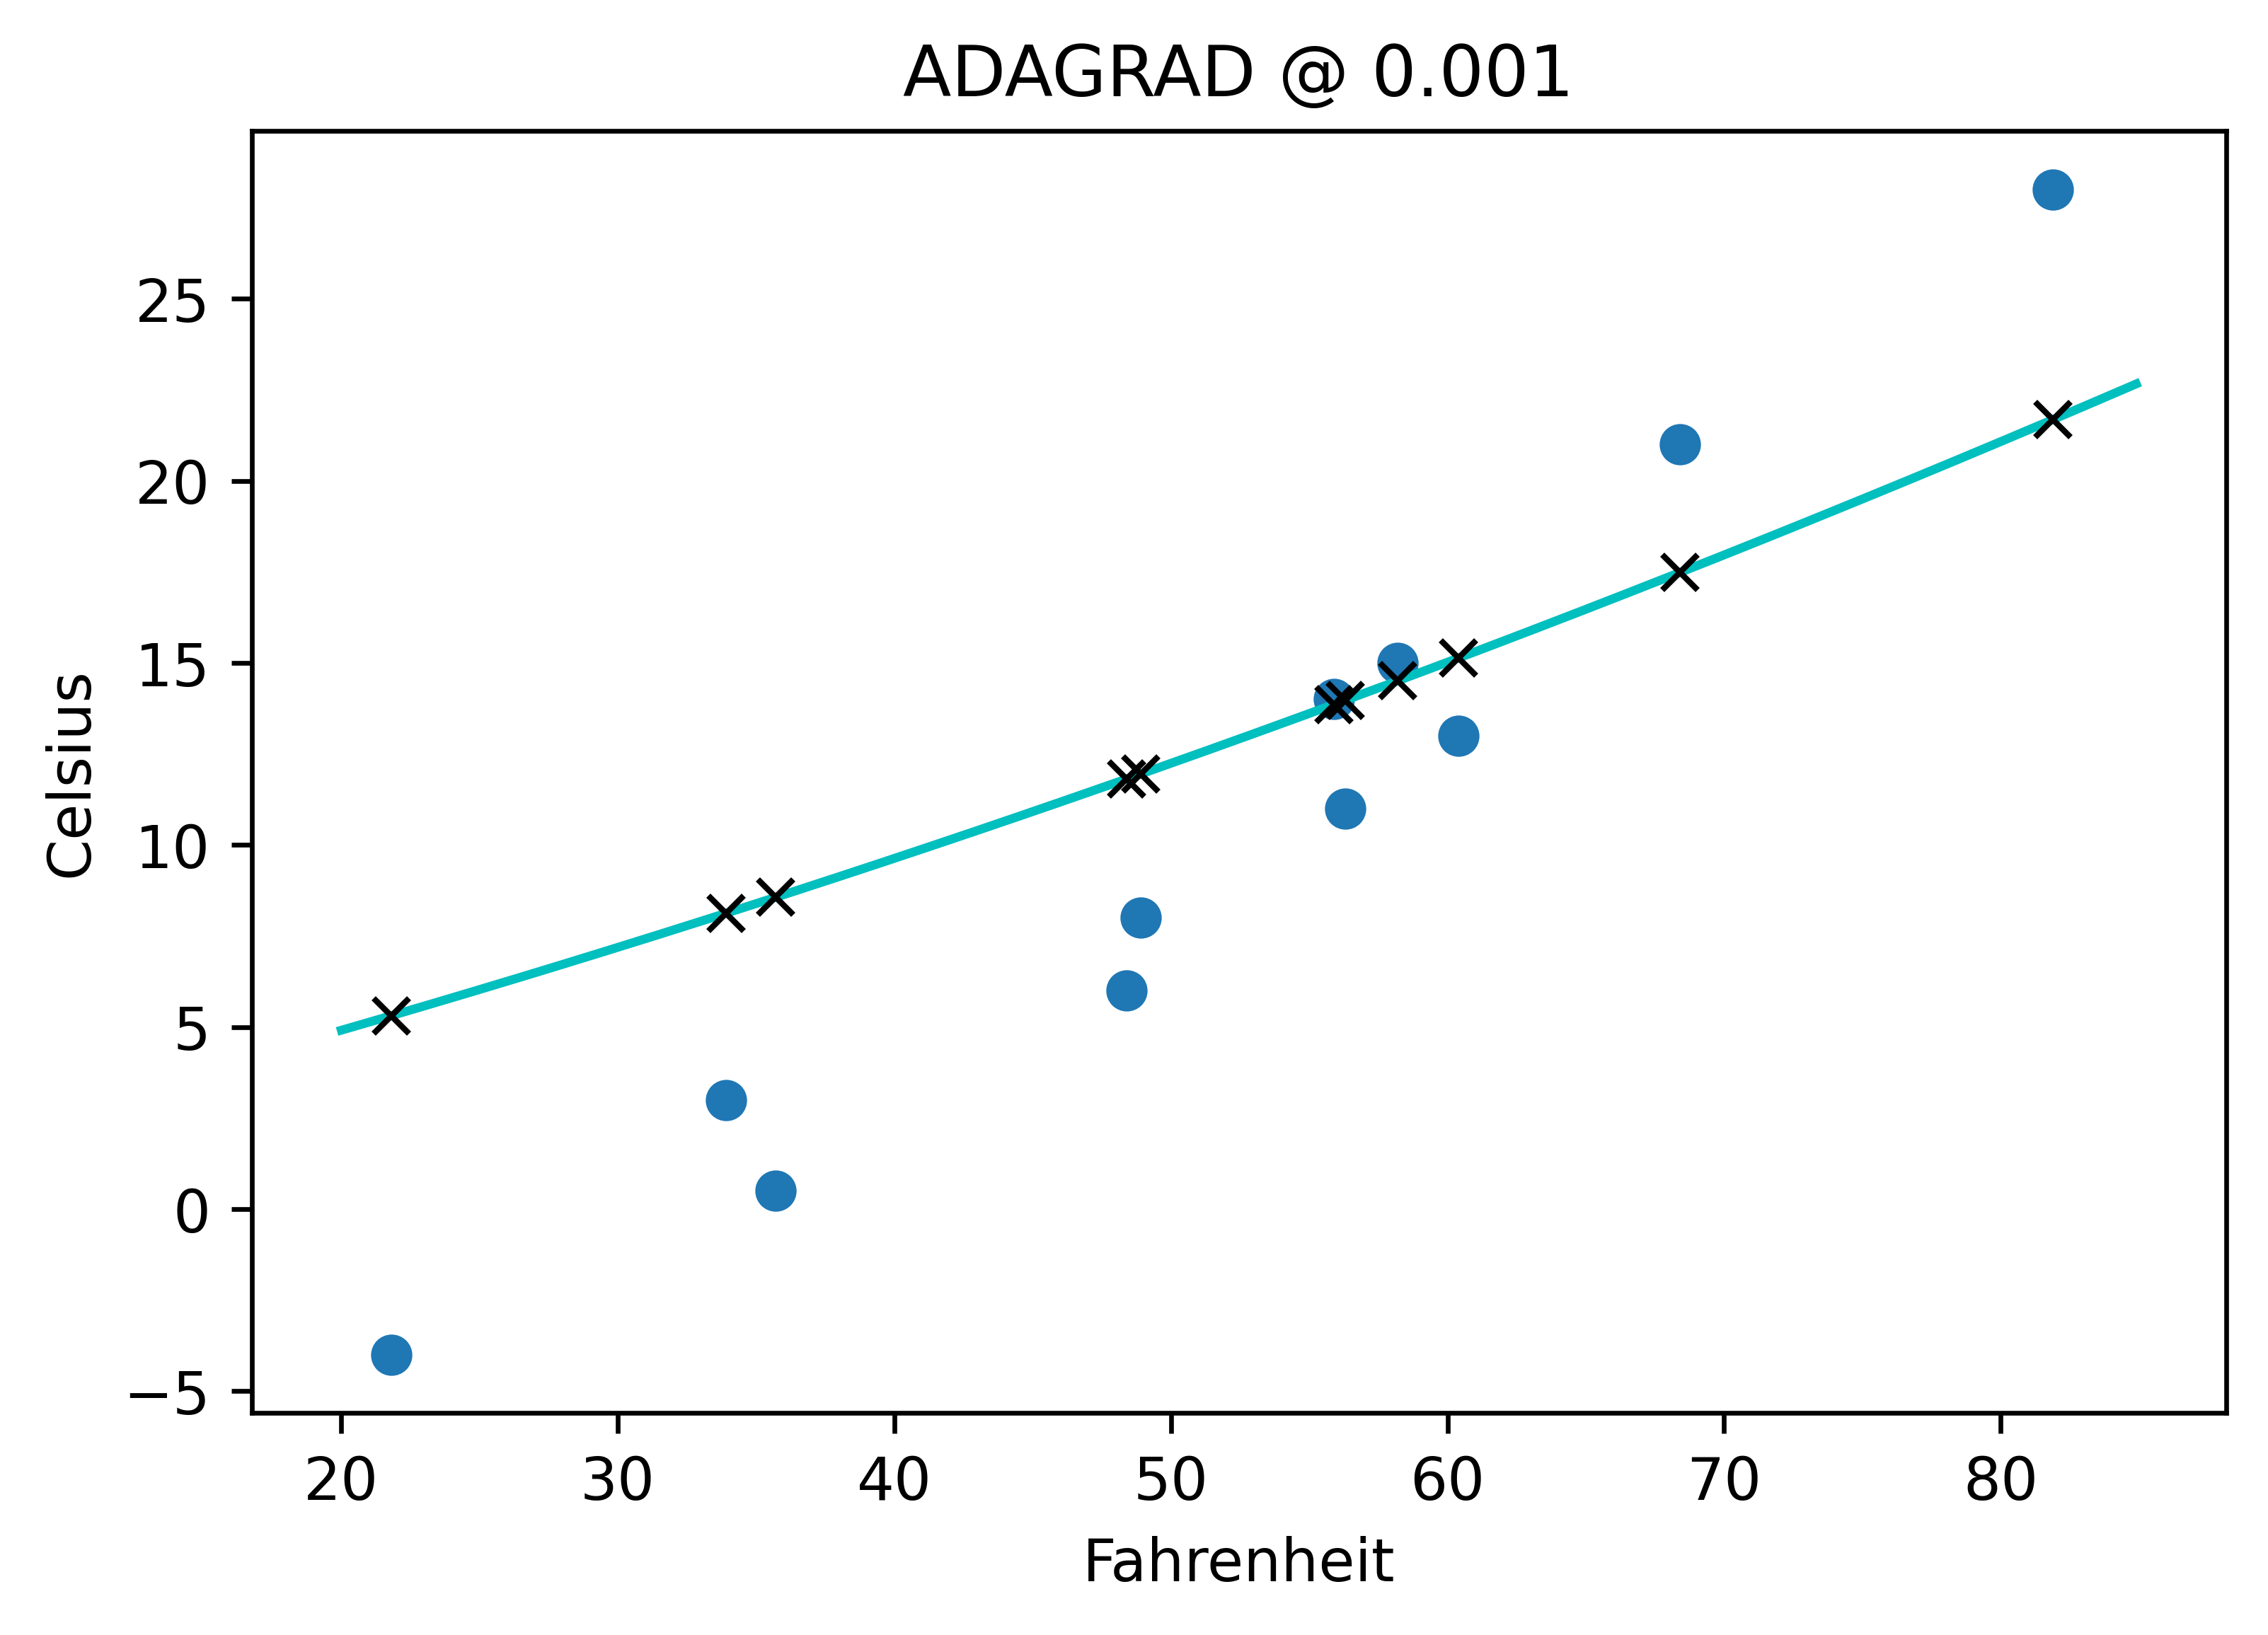

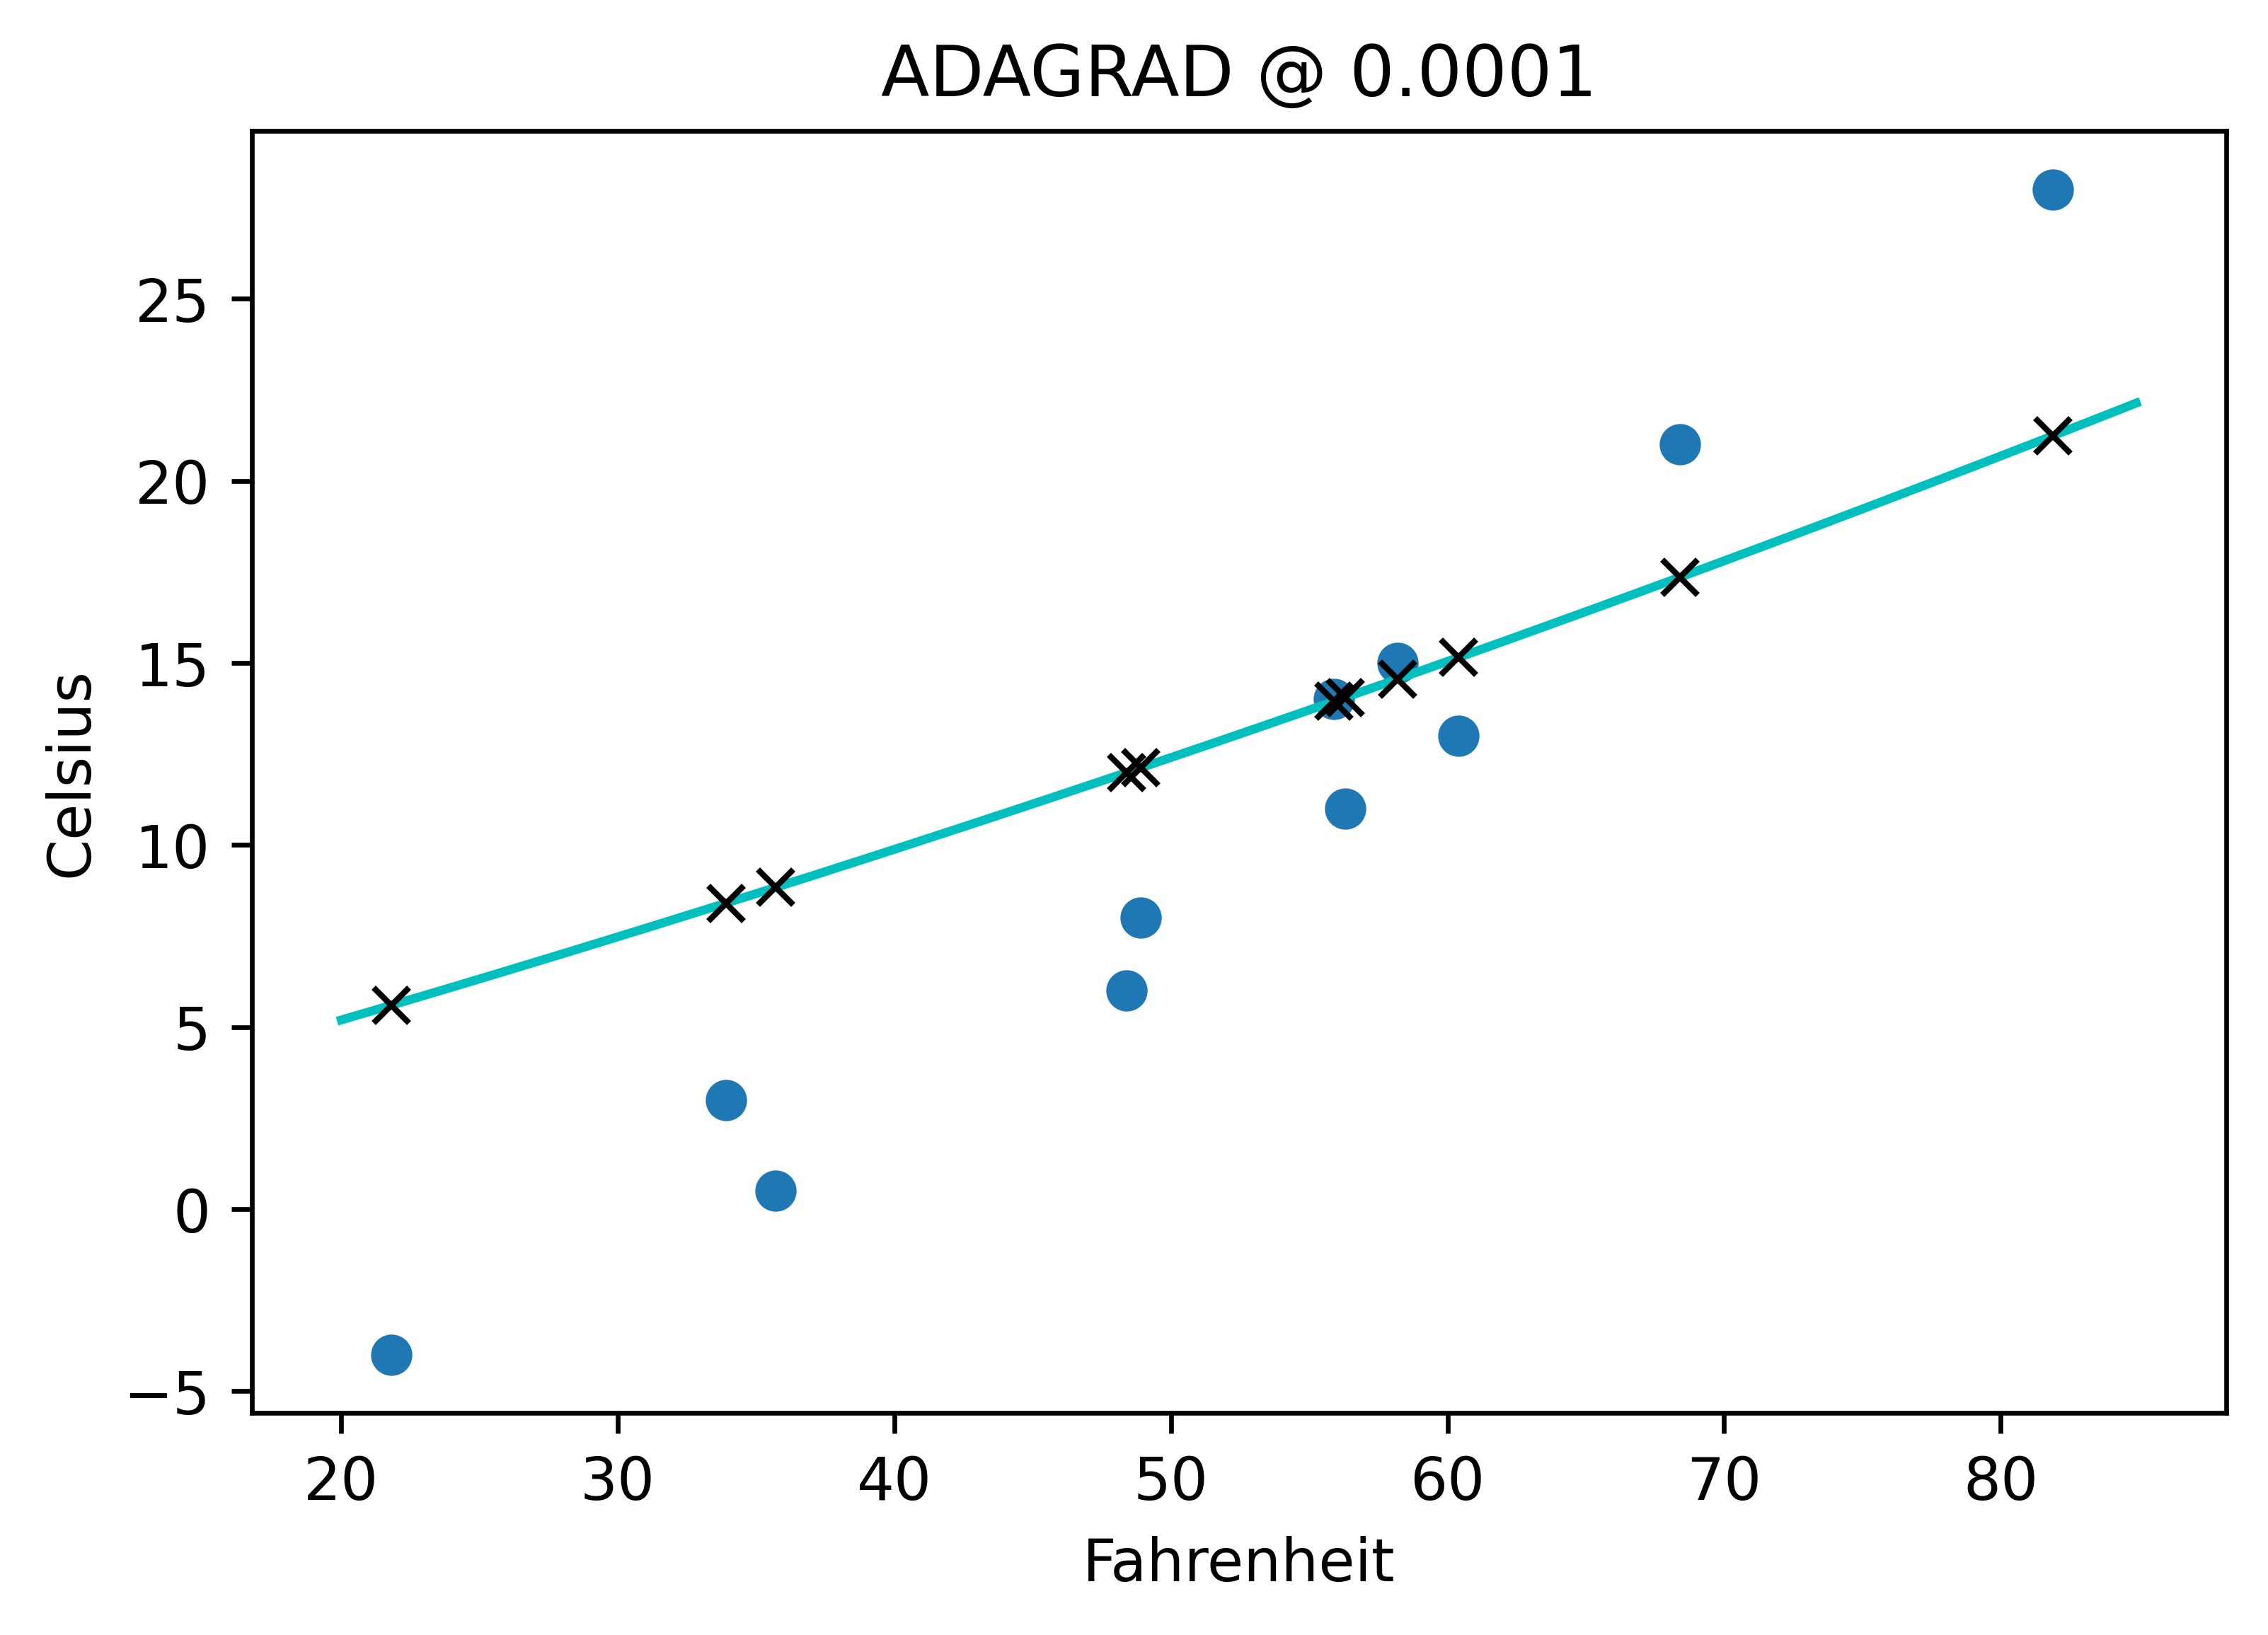

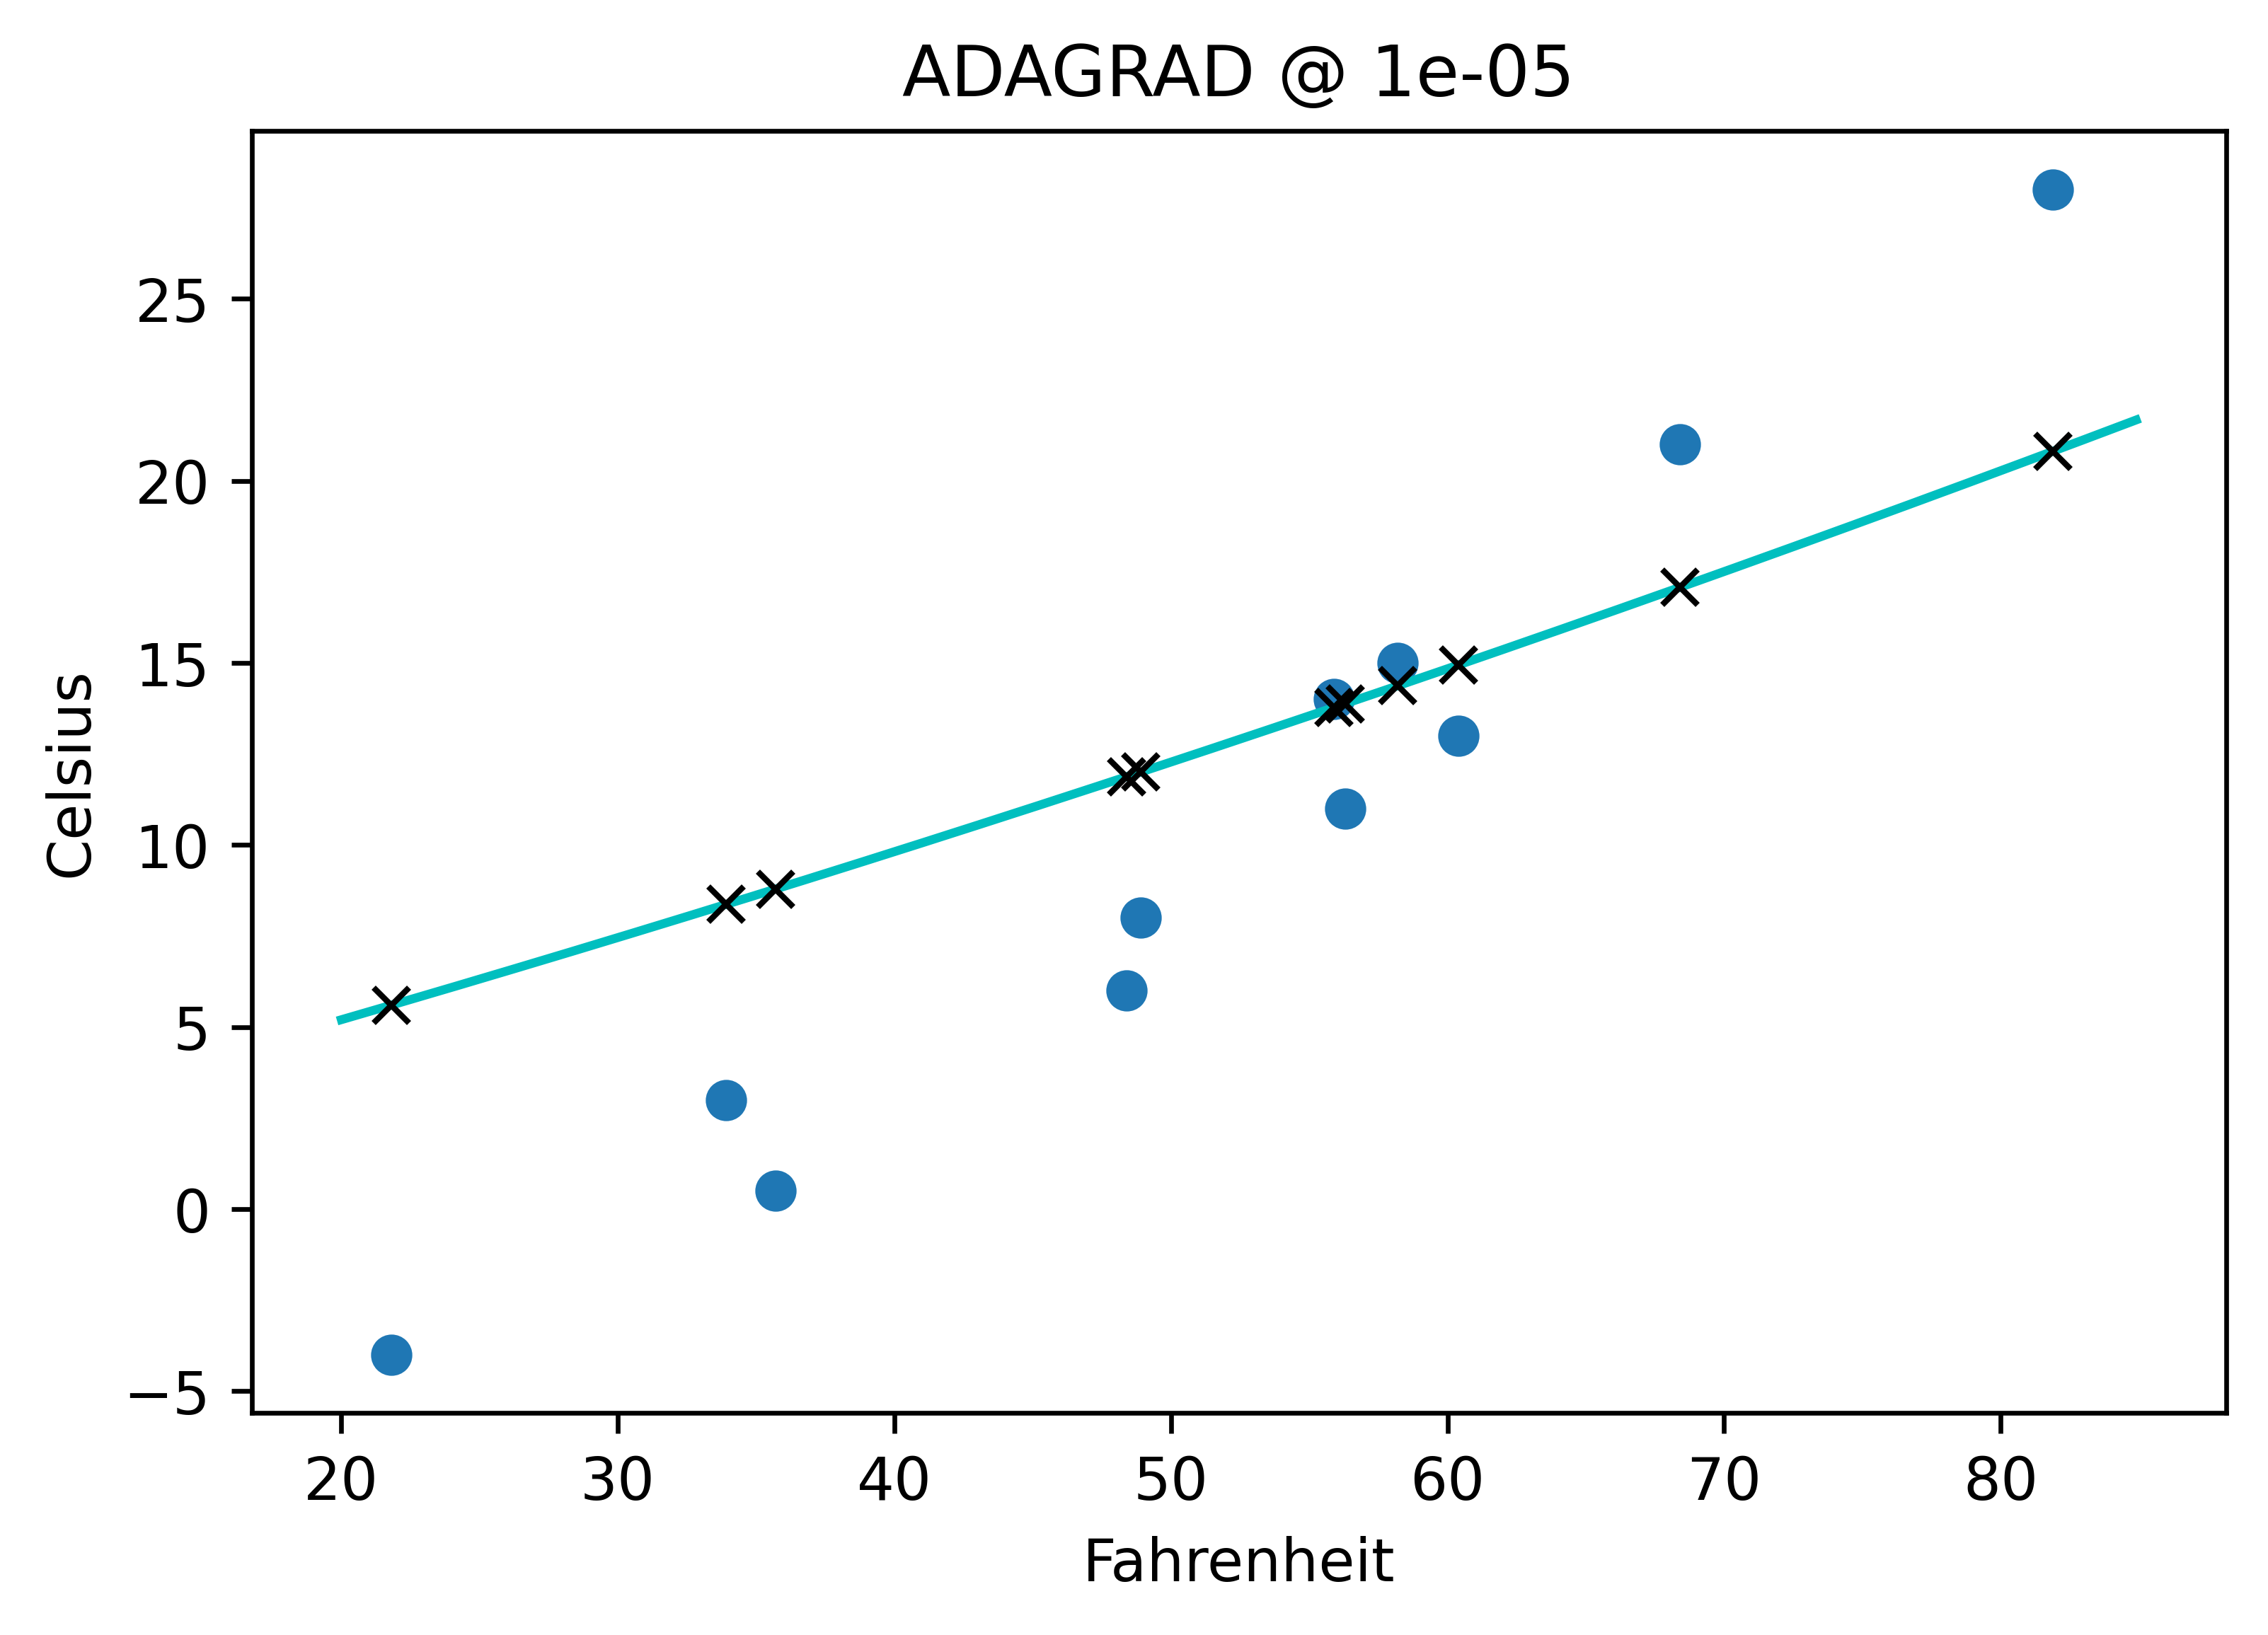

In [22]:
for rate in rates_to_learn_at:
    print(f"Learning rate is {rate} :\n"+"/\\"*15)
    
    params = torch.tensor(initial_paramaters, requires_grad=True)
    learning_rate = rate
    optimizer = optim.Adagrad([params], lr=learning_rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    
    print(f"Final Paramaters: {params}")
    
    if not (True in torch.isnan(params)):
        graph_temp(model, params, t_u, t_c, f"ADAGRAD @ {rate}")
    
    print('\n'+"--"*30+'\n')

Learning rate is 0.1 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss nan
    Epoch 1000, Loss nan
    Epoch 1500, Loss nan
    Epoch 2000, Loss nan
    Epoch 2500, Loss nan
    Epoch 3000, Loss nan
    Epoch 3500, Loss nan
    Epoch 4000, Loss nan
    Epoch 4500, Loss nan
    Epoch 5000, Loss nan
Final Paramaters: tensor([nan, nan, nan], requires_grad=True)

------------------------------------------------------------

Learning rate is 0.01 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss nan
    Epoch 1000, Loss nan
    Epoch 1500, Loss nan
    Epoch 2000, Loss nan
    Epoch 2500, Loss nan
    Epoch 3000, Loss nan
    Epoch 3500, Loss nan
    Epoch 4000, Loss nan
    Epoch 4500, Loss nan
    Epoch 5000, Loss nan
Final Paramaters: tensor([nan, nan, nan], requires_grad=True)

------------------------------------------------------------

Learning rate is 0.001 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
    Epoch 500, Loss nan
    Epoch 1000, Loss nan
    Epoch 1500, Loss nan
    Epoch 200

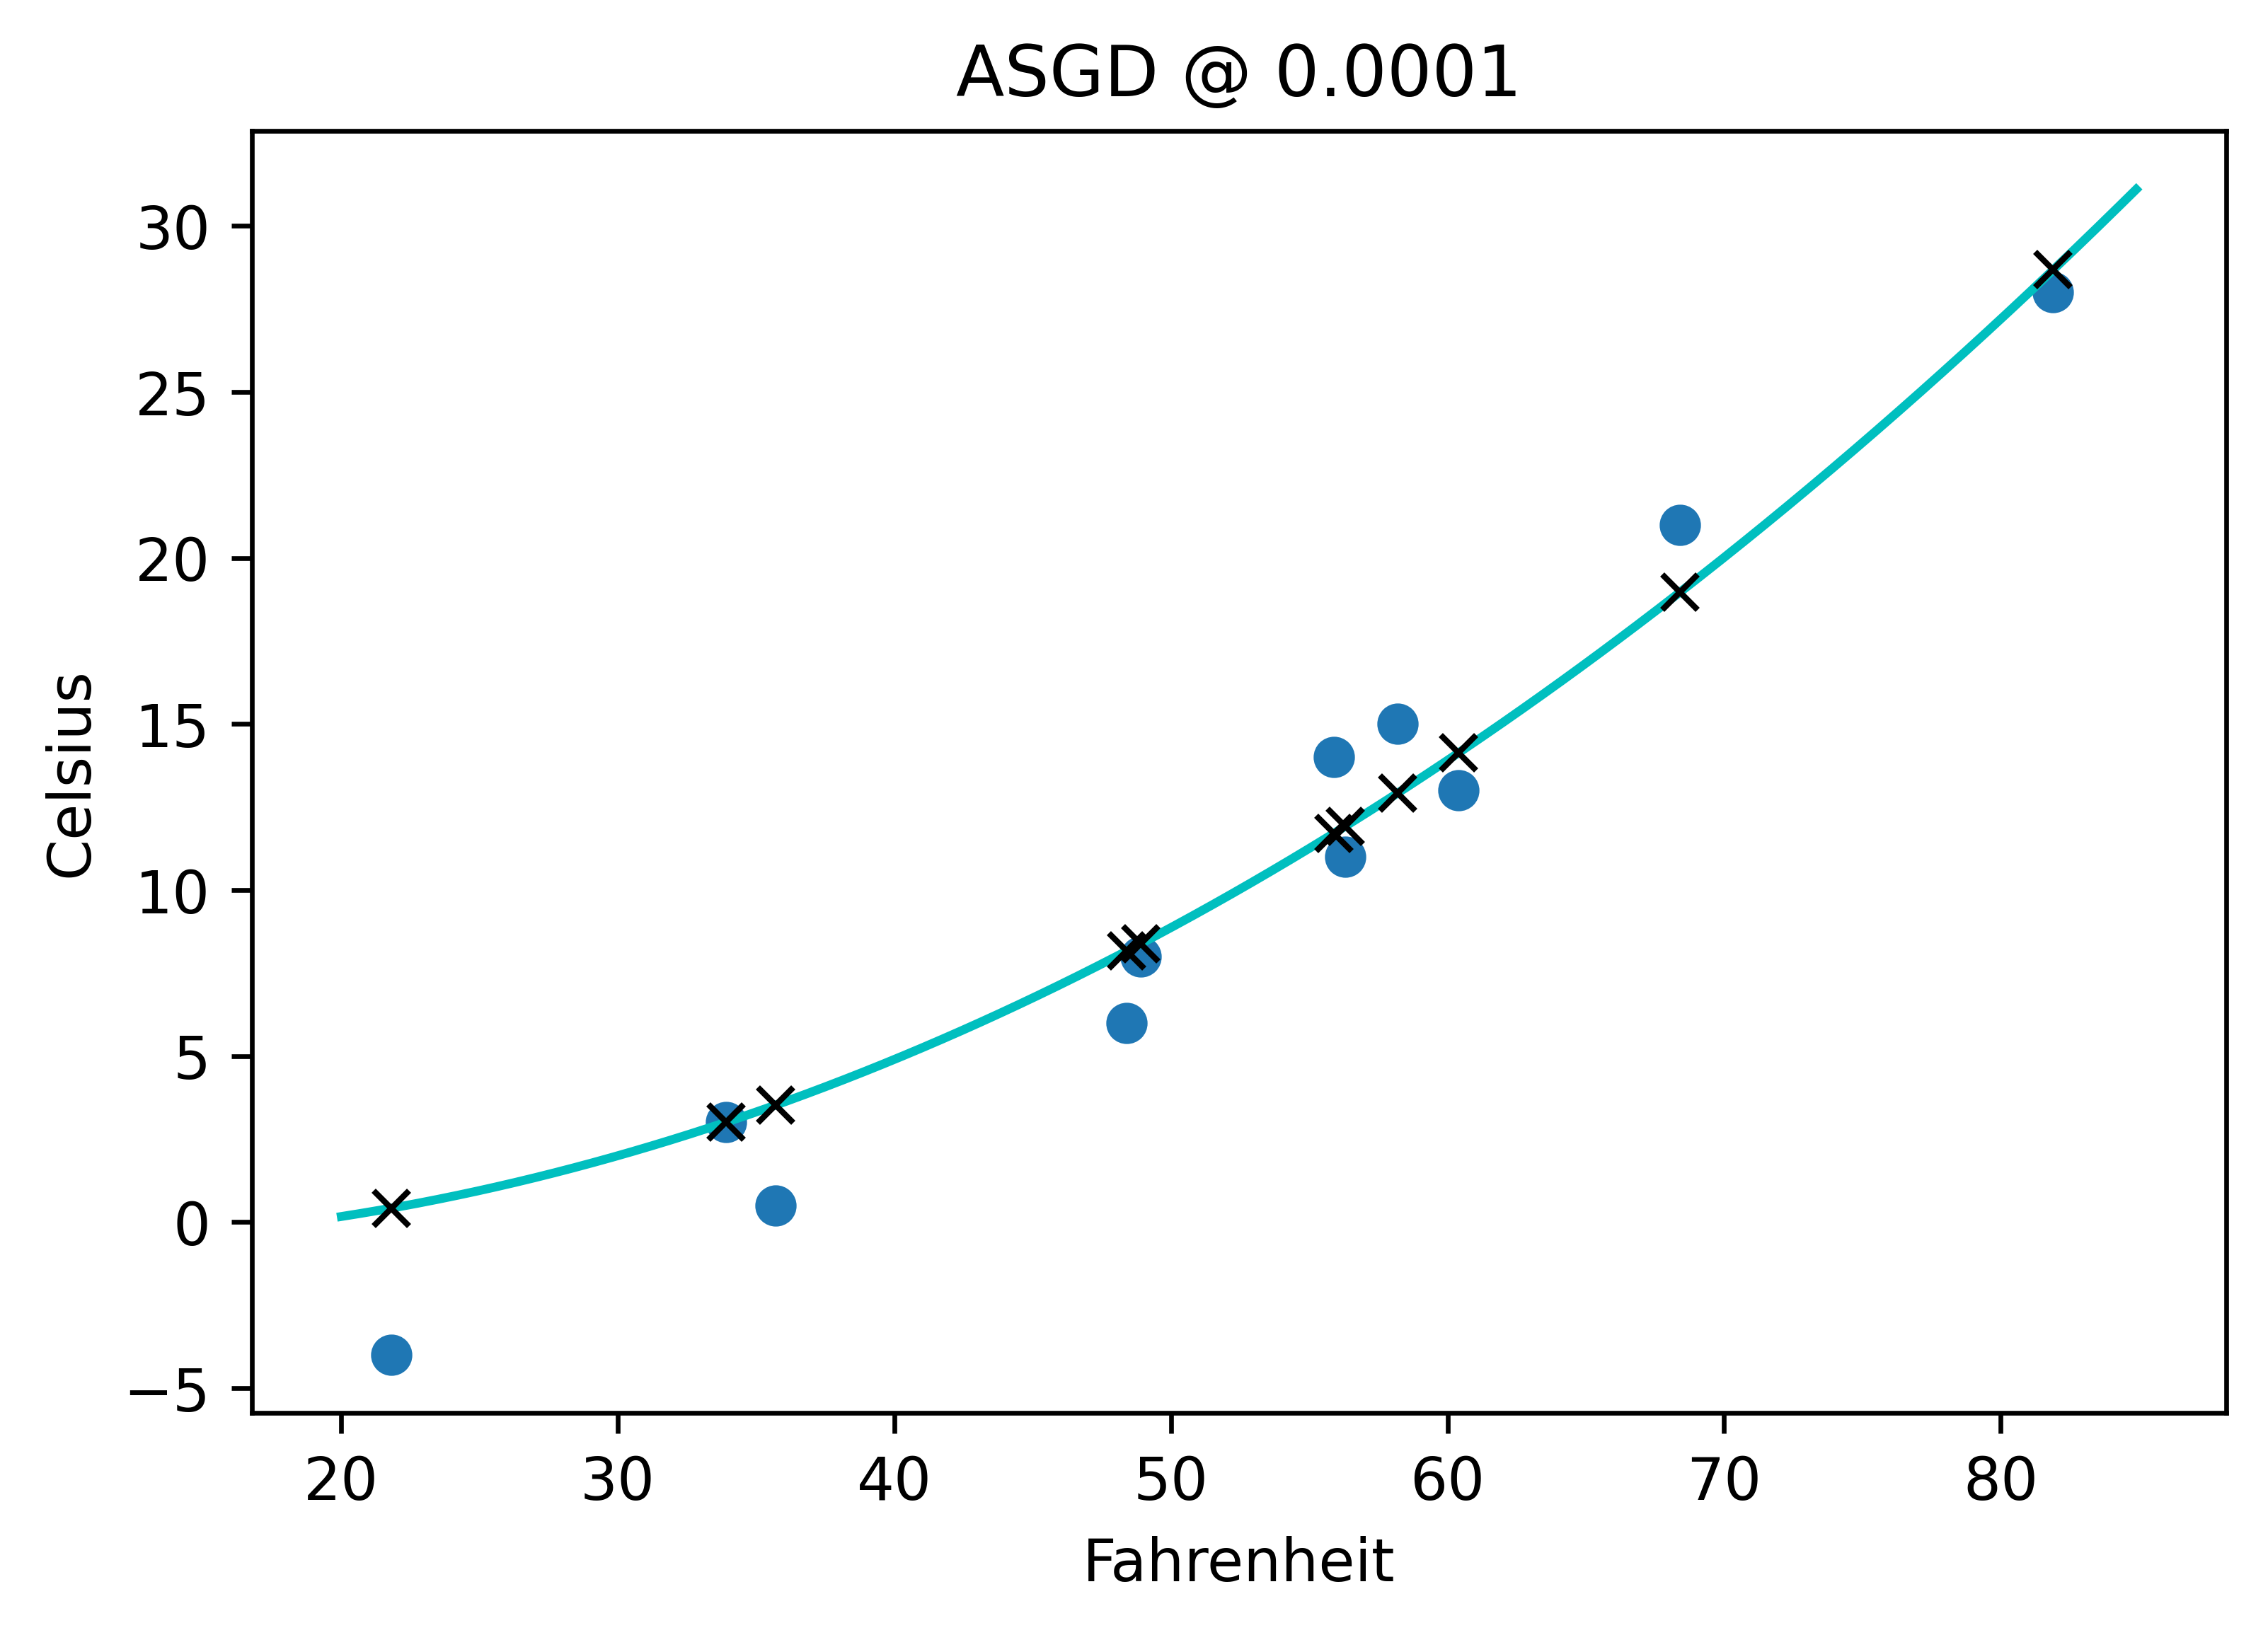

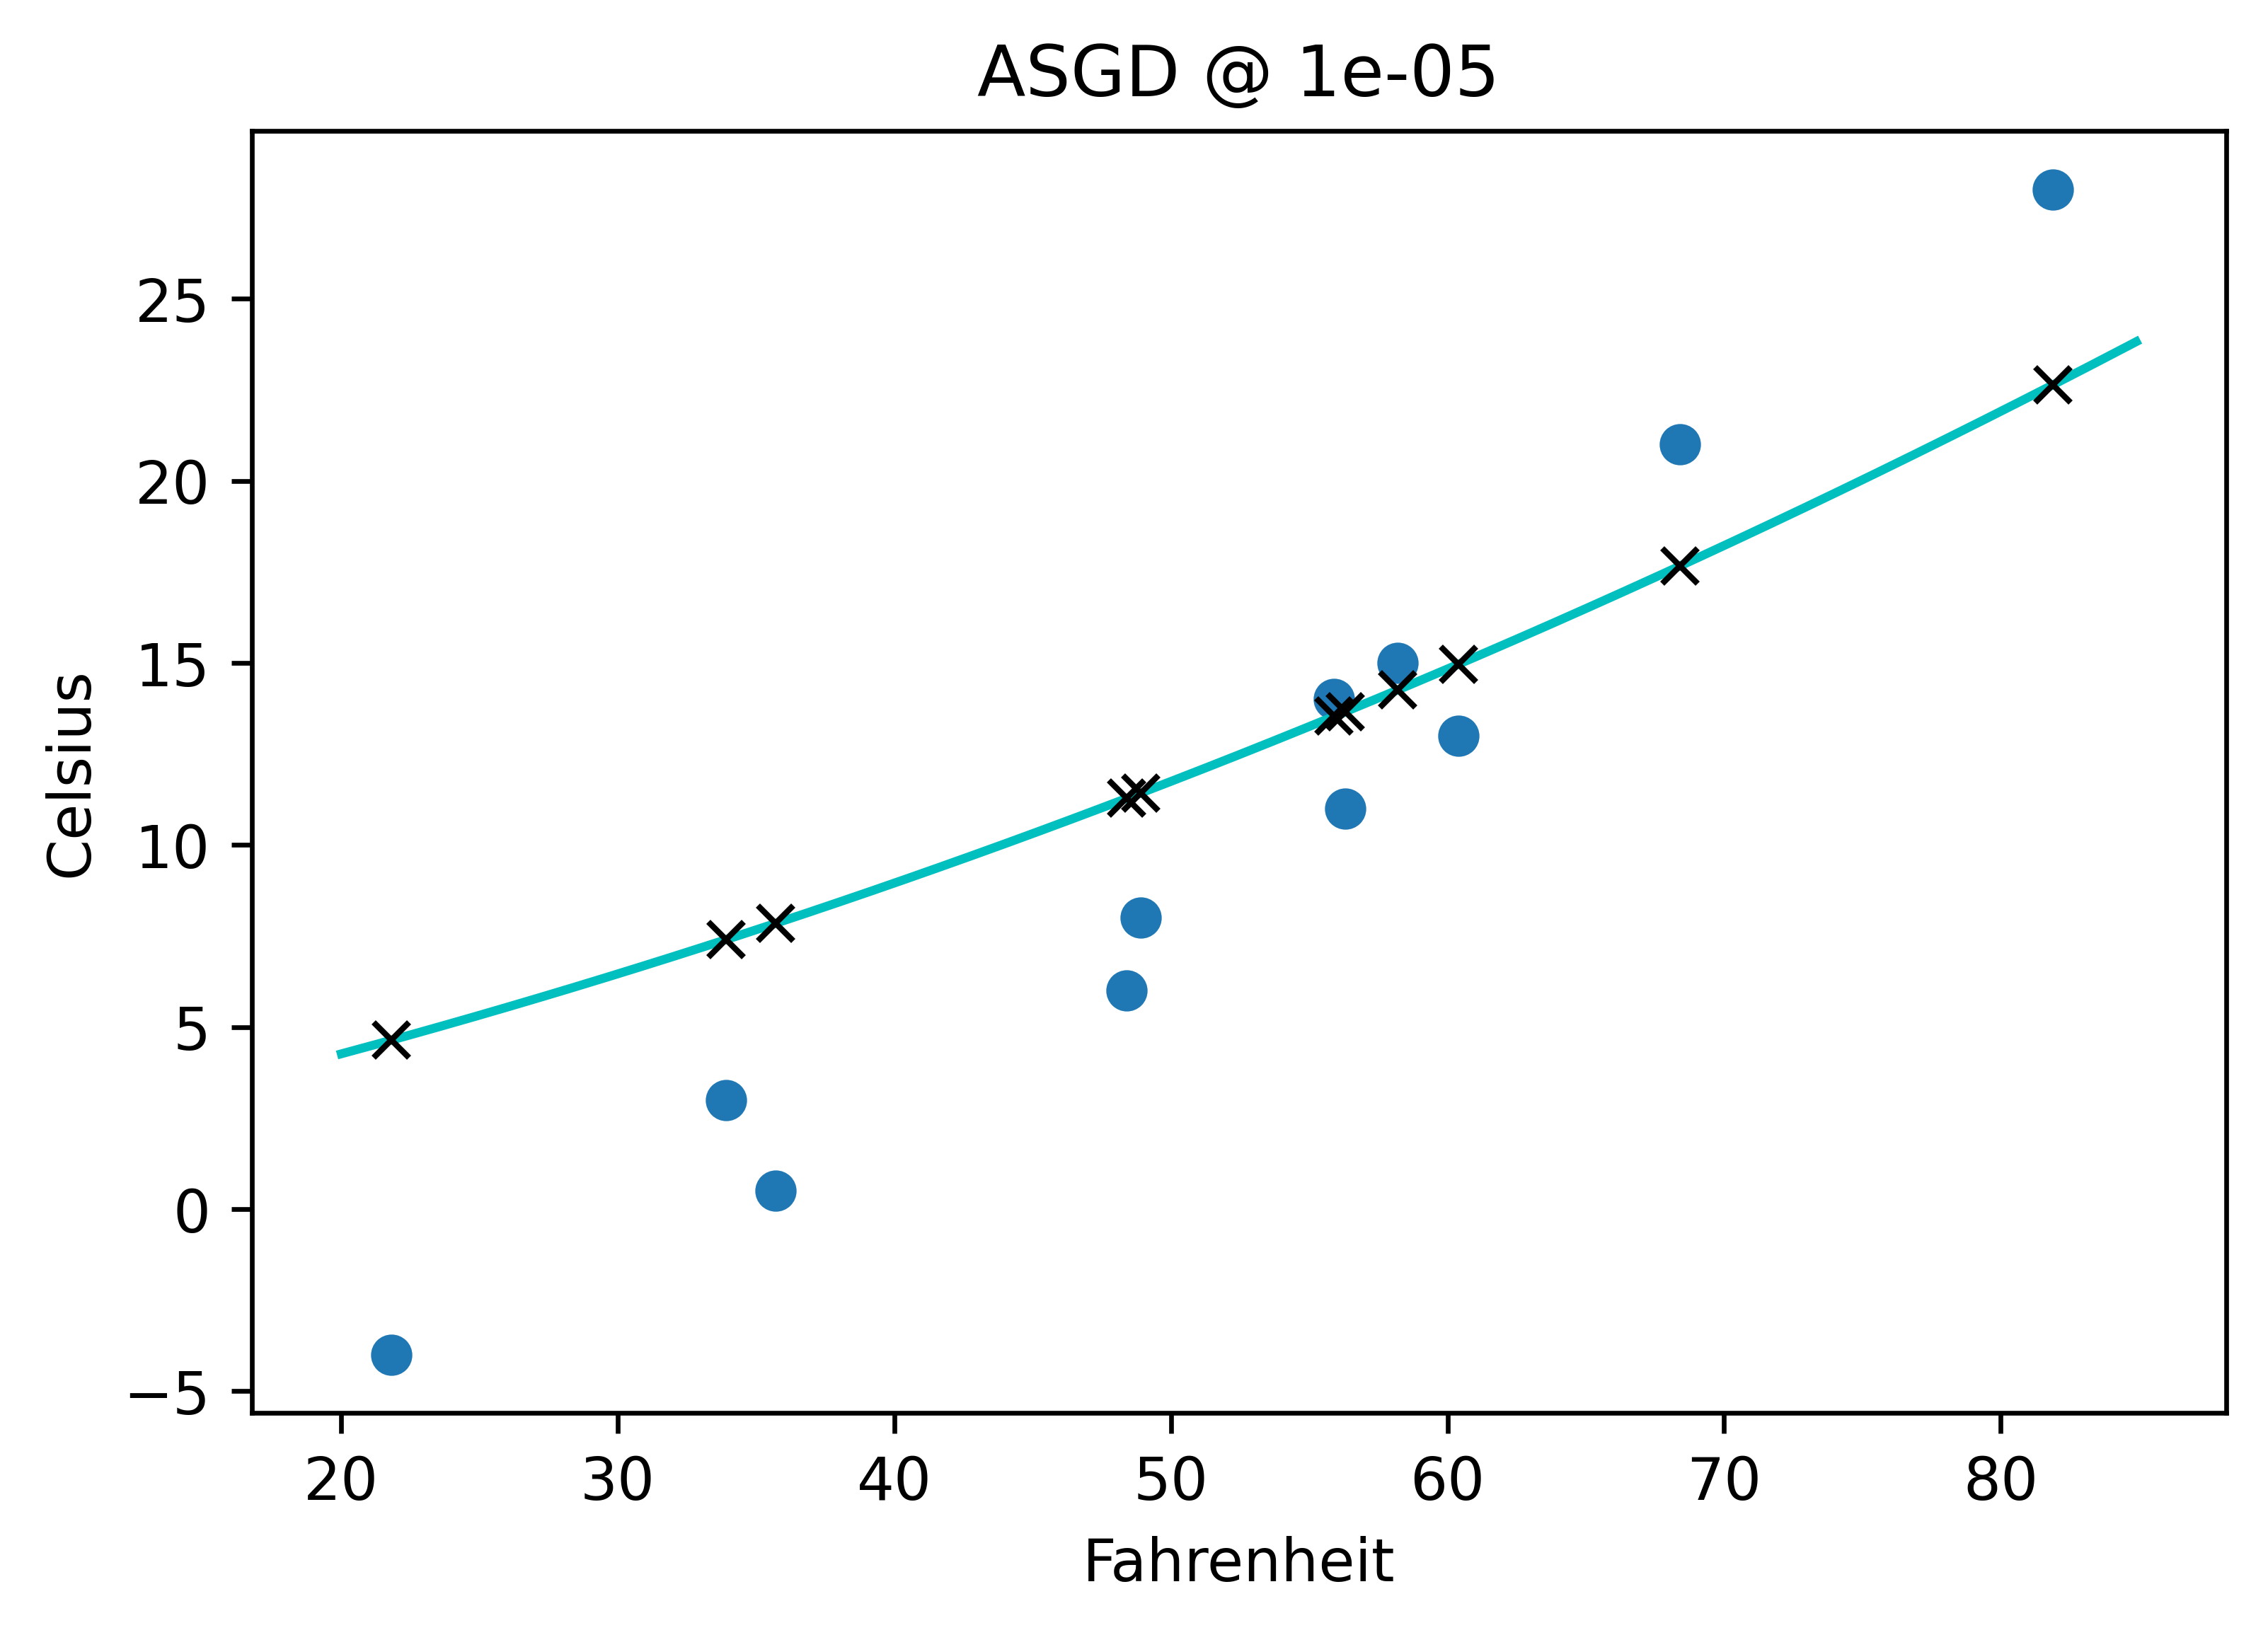

In [23]:
for rate in rates_to_learn_at:
    print(f"Learning rate is {rate} :\n"+"/\\"*15)
    
    params = torch.tensor(initial_paramaters, requires_grad=True)
    learning_rate = rate
    optimizer = optim.ASGD([params], lr=learning_rate) 

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    
    print(f"Final Paramaters: {params}")
    
    if not (True in torch.isnan(params)):
        graph_temp(model, params, t_u, t_c, f"ASGD @ {rate}")
    
    print('\n'+"--"*30+'\n')

Problem 2

In [25]:
torch.set_printoptions(edgeitems=2, linewidth=75)
percent_for_validation = 0.2
def model(feature, w5, w4, w3, w2, w1, b):
    return feature[4] * w5 + feature[3] * w4 + feature[2] * w3 + feature[1] * w2 + feature[0] * w1 + b

def loss_function(predicted, actual):
    squared_diffs = (predicted - actual)**2
    return squared_diffs.mean()

rates_to_learn_at = [1/x for x in [5, 10, 100, 1000, 10000, 100000]]


In [26]:
url= 'https://raw.githubusercontent.com/jasanchez19/Machine-Learning-Tensors-and-Neural-Networks/main/Housing.csv'

housing_df=pd.read_csv(url)
housing_df.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished


In [29]:
feature_list = list( housing_df.columns )

def boolean_map(x):
    return x.map({'yes': 1 , 'no': 0})
def furnish_map(x):
    return x.map({'furnished': 1 , 'semi-furnished': 0.5 , 'unfurnished': 0})


binary_vars = [*feature_list[5:10], feature_list[11]]
print(f"binary variables = {binary_vars}")


furnish_vars = [feature_list[12]]
print(f"furnish variables = {furnish_vars}")


valued_vars = feature_list.copy()
[valued_vars.remove( item ) for item in binary_vars]
[valued_vars.remove( item ) for item in furnish_vars]
print(f"value variables = {valued_vars}")

binary variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnish variables = ['furnishingstatus']
value variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [31]:
x_df = housing_df.copy()


scaler = StandardScaler()


x_df[valued_vars] = scaler.fit_transform(x_df[valued_vars])


x_df[binary_vars] = x_df[binary_vars].apply(boolean_map)
x_df[furnish_vars] = x_df[furnish_vars].apply(furnish_map)


y_df = x_df.pop('price')

for item in [*binary_vars, *furnish_vars] :
    x_df.pop(item)

In [32]:
x = torch.tensor(x_df.values)
y = torch.tensor(y_df.values)

print(x.shape)
print("\n")
x

torch.Size([545, 5])




tensor([[ 1.0467,  1.4034,  ...,  1.3782,  1.5177],
        [ 1.7570,  1.4034,  ...,  2.5320,  2.6794],
        ...,
        [-1.0334,  0.0473,  ..., -0.9294, -0.8057],
        [-0.5998,  0.0473,  ...,  0.2244, -0.8057]], dtype=torch.float64)

In [33]:
x_t = x.transpose(-2, 1)
x_t.shape

torch.Size([5, 545])

In [34]:
n_samples = x.shape[0]
n_val = int(percent_for_validation * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

print(f"Training:\n{train_indices}")
print()
print(f"Validation:\n{val_indices}")

Training:
tensor([ 86,  89, 187, 261, 435,  65, 371,  42, 358, 495,  81, 258, 229,
        122, 419, 541,  11, 411, 225, 272,  83, 302, 116, 150,   3, 436,
        188, 426, 217,  85, 241, 494, 249, 357, 509, 422, 119, 343, 184,
        330, 132, 129,  64,  24,  25, 221, 389, 504, 484, 240, 219, 277,
        227, 407, 466, 189, 239, 305, 313, 266,  49,  69, 464, 507, 215,
        524, 203,  59,  26, 364, 235, 423, 502, 375, 479, 337, 374, 270,
        255, 519,  96, 226, 377, 243, 421, 324, 309, 160,   7, 478, 176,
        107, 350, 224,  90,  74, 311,  80, 425,  79, 186, 487, 340,  66,
        196, 408,  15, 190, 510, 168, 292, 477,  78,  35, 525,  98,  87,
        182, 540, 537,  88, 142, 175, 490, 450, 114, 415, 260, 279, 136,
          8,  51,  68, 202,  14, 322,   4,  77, 208, 493, 213, 156, 118,
        471, 505, 513, 439, 216, 521, 348, 232,  57, 151, 538, 459, 135,
        396,   9, 543,  16, 133, 154,  30, 131, 278, 544,  40, 384, 468,
         31, 146, 137, 113,  70, 516, 108

In [35]:
training_x = x[train_indices]
training_y  = y [train_indices]

validation_x = x[val_indices]
validation_y  = y[val_indices]

In [36]:
def training_loop(n_epochs, optimizer, params, 
                  train_x, val_x,
                  train_y, val_y):
    for epoch in range(1, n_epochs + 1):
        train_predicted = model(train_x.transpose(-2, 1), *params)
        train_loss = loss_function(train_predicted, train_y)


        with torch.no_grad(): 
            val_predicted = model(val_x.transpose(-2, 1), *params)
            val_loss = loss_function(val_predicted, val_y)
            assert val_loss.requires_grad == False
            
        optimizer.zero_grad()
        
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.5f},"
                  f" Validation loss {val_loss.item():.5f}")

In [37]:
for rate in rates_to_learn_at:
    print(f"  Learning rate is {rate} :\n"+"/\\"*15)
    
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

    optimizer = optim.SGD([params], lr=rate)

    training_loop(
        n_epochs = 5000, 
        optimizer = optimizer,
        params = params,
        train_x = training_x, 
        val_x = validation_x, 
        train_y = training_y,
        val_y = validation_y
    )
    
    val_predicted = model(validation_x.transpose(-2, 1), *params)
    val_loss = loss_function(val_predicted, validation_y)
    
    print(f"Loss:\t\t{val_loss:.5f}")
    print(f"Paramaters:\t{params.detach().numpy()}")
        
    print('\n'+"--"*30+'\n')

  Learning rate is 0.2 :
/\/\/\/\/\/\/\/\/\/\/\/\/\/\/\
Epoch 1, Training loss 5.88769, Validation loss 6.73406
Epoch 2, Training loss 0.79047, Validation loss 0.91681
Epoch 3, Training loss 0.48521, Validation loss 0.48249
Epoch 500, Training loss 0.45175, Validation loss 0.39507
Epoch 1000, Training loss 0.45175, Validation loss 0.39507
Epoch 1500, Training loss 0.45175, Validation loss 0.39507
Epoch 2000, Training loss 0.45175, Validation loss 0.39507
Epoch 2500, Training loss 0.45175, Validation loss 0.39507
Epoch 3000, Training loss 0.45175, Validation loss 0.39507
Epoch 3500, Training loss 0.45175, Validation loss 0.39507
Epoch 4000, Training loss 0.45175, Validation loss 0.39507
Epoch 4500, Training loss 0.45175, Validation loss 0.39507
Epoch 5000, Training loss 0.45175, Validation loss 0.39507
Loss:		0.39507
Paramaters:	[0.18190093 0.27097335 0.27894154 0.07617773 0.41892824 0.00181276]

------------------------------------------------------------

  Learning rate is 0.1 :
/\/\

Problem 3

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def model(feature, w5, w4, w3, w2, w1, b):
    return feature[4] * w5 + feature[3] * w4 + feature[2] * w3 + feature[1] * w2 + feature[0] * w1 + b
def loss_fn(predicted, actual):
    squared_diffs = (predicted - actual)**2
    return squared_diffs.mean()
rates_to_learn_at = [1/x for x in [10, 100, 1000, 10000, 100000]]
rates_to_learn_at

[0.1, 0.01, 0.001, 0.0001, 1e-05]

In [39]:
percent_for_validation = 0.2

url= 'https://raw.githubusercontent.com/jasanchez19/Machine-Learning-Tensors-and-Neural-Networks/main/Housing.csv'

housing_df=pd.read_csv(url)
housing_df.head(100)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6300000,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
97,6300000,6400,3,1,1,yes,yes,yes,no,yes,1,yes,semi-furnished
98,6293000,6600,3,2,3,yes,no,no,no,yes,0,yes,unfurnished


In [41]:
feature_list = list( housing_df.columns )

def boolean_map(x):
    return x.map({'yes': 1 , 'no': 0})
def furnish_map(x):
    return x.map({'furnished': 1 , 'semi-furnished': 0.5 , 'unfurnished': 0})

binary_vars = [*feature_list[5:10], feature_list[11]]
print(f"binary variables = {binary_vars}")

furnish_vars = [feature_list[12]]
print(f"furnish variables = {furnish_vars}")

valued_vars = feature_list.copy()
[valued_vars.remove( item ) for item in binary_vars]
[valued_vars.remove( item ) for item in furnish_vars]
print(f"value variables = {valued_vars}")

binary variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnish variables = ['furnishingstatus']
value variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [42]:
x_df = housing_df.copy()

scaler = StandardScaler()

x_df[valued_vars] = scaler.fit_transform(x_df[valued_vars])

x_df[binary_vars] = x_df[binary_vars].apply(boolean_map)
x_df[furnish_vars] = x_df[furnish_vars].apply(furnish_map)

y_df = x_df.pop('price')

In [43]:
for item in [*binary_vars, *furnish_vars] :
    x_df.pop(item)
x_df.head()

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692


In [45]:
x = torch.tensor(x_df.values, dtype=torch.float32)
y = torch.tensor(y_df.values, dtype=torch.float32)


In [46]:
n_samples = x.shape[0]
n_val = int(percent_for_validation * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

training_x = x[train_indices]
training_y  = y [train_indices].unsqueeze(1)

validation_x = x[val_indices]
validation_y  = y[val_indices].unsqueeze(1)


In [47]:
type(training_x)


torch.Tensor

In [48]:
training_x.shape


torch.Size([436, 5])

In [49]:
num_features = training_x.shape[1]
print(num_features)

linear_model = nn.Linear(num_features,1) # <1>
linear_model(training_x)

5


tensor([[ 0.0886],
        [ 0.4669],
        [ 0.2051],
        [-0.1940],
        [-0.0532],
        [ 0.3670],
        [ 0.3228],
        [-0.4636],
        [ 0.5630],
        [ 0.0726],
        [ 0.6265],
        [-0.4636],
        [-0.0074],
        [ 0.3718],
        [ 0.4112],
        [ 0.3217],
        [ 0.4570],
        [ 0.3283],
        [ 0.6357],
        [-0.0191],
        [-0.0164],
        [ 0.5889],
        [ 0.5031],
        [-0.1459],
        [ 0.2287],
        [ 0.5889],
        [ 0.1943],
        [ 0.5347],
        [-0.3816],
        [-0.8781],
        [-0.6129],
        [ 0.6483],
        [ 0.5512],
        [ 0.4321],
        [-0.4013],
        [-0.0365],
        [ 0.0572],
        [-0.0392],
        [ 0.6063],
        [ 0.4284],
        [-1.0904],
        [ 0.0315],
        [ 0.5612],
        [ 0.0631],
        [-0.0360],
        [-0.2432],
        [ 0.5866],
        [ 0.0613],
        [-0.8781],
        [ 0.2044],
        [ 0.5297],
        [ 0.5514],
        [-0.

In [50]:
linear_model.weight


Parameter containing:
tensor([[-0.0993, -0.0717,  0.0913, -0.4127,  0.0566]],
       requires_grad=True)

In [51]:
linear_model.bias


Parameter containing:
tensor([0.1564], requires_grad=True)

In [52]:
linear_model = nn.Linear(5, 1) 
optimizer = optim.SGD(
    linear_model.parameters(), 
    lr=1e-2)

linear_model(training_x)

tensor([[ 3.1774e-01],
        [-4.5467e-01],
        [ 5.6775e-01],
        [ 1.2259e-01],
        [ 4.6238e-01],
        [ 5.1390e-01],
        [-5.4713e-01],
        [-2.2165e-01],
        [ 3.8889e-01],
        [-2.2936e-01],
        [ 1.2924e+00],
        [-2.2165e-01],
        [ 6.3178e-01],
        [-1.3724e-01],
        [ 5.5255e-02],
        [-1.4327e+00],
        [-3.4537e-02],
        [-2.9817e-01],
        [-1.1543e-02],
        [-2.9273e-01],
        [-2.8256e-01],
        [ 1.1535e+00],
        [ 1.0170e+00],
        [ 3.0046e-01],
        [-6.6662e-01],
        [ 1.1535e+00],
        [-3.5336e-01],
        [ 1.1339e+00],
        [ 7.5050e-01],
        [-1.1333e+00],
        [ 7.6148e-02],
        [ 2.1616e-01],
        [ 1.1949e+00],
        [ 7.5445e-01],
        [-1.5415e+00],
        [ 5.2404e-01],
        [ 8.7063e-01],
        [-1.4927e+00],
        [ 1.2179e+00],
        [-5.9696e-01],
        [-1.5250e+00],
        [ 7.7577e-01],
        [ 1.6973e-01],
        [-6

In [53]:
list(linear_model.parameters())


[Parameter containing:
 tensor([[-0.3673, -0.1319, -0.1957, -0.2238, -0.3666]],
        requires_grad=True), Parameter containing:
 tensor([0.1711], requires_grad=True)]

In [56]:
#training fn for neural network

def training_loop(n_epochs, optimizer, model, loss_fn, 
                  train_x, val_x,
                  train_y, val_y, 
                  epoch_report = 1000):
    for epoch in range(1, n_epochs + 1):
        train_p = model(train_x) 
        loss_train = loss_fn(train_p, train_y)

        val_p = model(val_x) 
        loss_val = loss_fn(val_p, val_y)
        
        optimizer.zero_grad()
        loss_train.backward() 
        optimizer.step()

        if epoch == 1 or epoch % epoch_report == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [57]:
linear_model = nn.Linear(5, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    train_x = training_x,
    val_x = validation_x, 
    train_y = training_y,
    val_y = validation_y, 
    epoch_report = 500
    )

print()
print("Weight", linear_model.weight)
print("Bias", linear_model.bias)

print("-"*50)

Epoch 1, Training loss 1.3365, Validation loss 1.5375
Epoch 500, Training loss 0.4115, Validation loss 0.5574
Epoch 1000, Training loss 0.4115, Validation loss 0.5572
Epoch 1500, Training loss 0.4115, Validation loss 0.5572
Epoch 2000, Training loss 0.4115, Validation loss 0.5572
Epoch 2500, Training loss 0.4115, Validation loss 0.5572
Epoch 3000, Training loss 0.4115, Validation loss 0.5572

Weight Parameter containing:
tensor([[0.4062, 0.0752, 0.2649, 0.2859, 0.1658]], requires_grad=True)
Bias Parameter containing:
tensor([-0.0082], requires_grad=True)
--------------------------------------------------


In [58]:
seq_model_example = nn.Sequential(
            nn.Linear(9, 22), # <1>
            nn.Tanh(),
            nn.Linear(22, 3)) # <2>
seq_model_example

Sequential(
  (0): Linear(in_features=9, out_features=22, bias=True)
  (1): Tanh()
  (2): Linear(in_features=22, out_features=3, bias=True)
)

In [59]:
for name, param in seq_model_example.named_parameters():
    print(name, param.shape)

0.weight torch.Size([22, 9])
0.bias torch.Size([22])
2.weight torch.Size([3, 22])
2.bias torch.Size([3])


In [60]:
from collections import OrderedDict

seq_model_example = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

In [61]:
for name, param in seq_model_example.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [62]:
seq_model_example.output_linear.bias


Parameter containing:
tensor([0.2505], requires_grad=True)

In [63]:
print(f"train_x:  {training_x.shape}")
print(f"train_y:  {training_y.shape}")
print(f"valid_x:  {validation_x.shape}")
print(f"valid_y:  {validation_y.shape}")

train_x:  torch.Size([436, 5])
train_y:  torch.Size([436, 1])
valid_x:  torch.Size([109, 5])
valid_y:  torch.Size([109, 1])


In [64]:
models = list()


In [65]:
linear_model_0 = nn.Linear(5, 1)



model = linear_model_0
models.append(model)

model.zero_grad()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer.zero_grad()

loss = nn.MSELoss()

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss,
    train_x = training_x,
    val_x = validation_x, 
    train_y = training_y,
    val_y = validation_y,  
    epoch_report = 25)

print()
print("Weight", linear_model.weight)
print("Bias", linear_model.bias)

print("-"*50)

Epoch 1, Training loss 1.2924, Validation loss 1.3938
Epoch 25, Training loss 1.1657, Validation loss 1.2753
Epoch 50, Training loss 1.0555, Validation loss 1.1716
Epoch 75, Training loss 0.9636, Validation loss 1.0845
Epoch 100, Training loss 0.8869, Validation loss 1.0113
Epoch 125, Training loss 0.8227, Validation loss 0.9496
Epoch 150, Training loss 0.7688, Validation loss 0.8975
Epoch 175, Training loss 0.7235, Validation loss 0.8533
Epoch 200, Training loss 0.6852, Validation loss 0.8158

Weight Parameter containing:
tensor([[0.4062, 0.0752, 0.2649, 0.2859, 0.1658]], requires_grad=True)
Bias Parameter containing:
tensor([-0.0082], requires_grad=True)
--------------------------------------------------


In [67]:
seq_model_1 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(5, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))


model = seq_model_1
models.append(model)

model.zero_grad()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer.zero_grad()

loss = nn.MSELoss()

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss,
    train_x = training_x,
    val_x = validation_x, 
    train_y = training_y,
    val_y = validation_y, 
    epoch_report = 25)

Epoch 1, Training loss 1.1536, Validation loss 1.2717
Epoch 25, Training loss 1.0957, Validation loss 1.2147
Epoch 50, Training loss 1.0417, Validation loss 1.1614
Epoch 75, Training loss 0.9932, Validation loss 1.1136
Epoch 100, Training loss 0.9494, Validation loss 1.0705
Epoch 125, Training loss 0.9098, Validation loss 1.0315
Epoch 150, Training loss 0.8738, Validation loss 0.9961
Epoch 175, Training loss 0.8410, Validation loss 0.9639
Epoch 200, Training loss 0.8110, Validation loss 0.9345


In [68]:
a = 10
b = 25
c = 8

seq_model_2 = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, a)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(a, b)),
    ('hidden_activation_2', nn.Tanh()),
    ('hidden_linear_3', nn.Linear(b, c)),
    ('hidden_activation_3', nn.Tanh()),
    ('output_linear', nn.Linear(c, 1))
]))


model = seq_model_2
models.append(model)

model.zero_grad()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer.zero_grad()

loss = nn.MSELoss()

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss,
    train_x = training_x,
    val_x = validation_x, 
    train_y = training_y,
    val_y = validation_y, 
    epoch_report = 25)

Epoch 1, Training loss 0.9525, Validation loss 0.9173
Epoch 25, Training loss 0.9417, Validation loss 0.9071
Epoch 50, Training loss 0.9309, Validation loss 0.8970
Epoch 75, Training loss 0.9205, Validation loss 0.8873
Epoch 100, Training loss 0.9103, Validation loss 0.8778
Epoch 125, Training loss 0.9004, Validation loss 0.8686
Epoch 150, Training loss 0.8905, Validation loss 0.8594
Epoch 175, Training loss 0.8806, Validation loss 0.8504
Epoch 200, Training loss 0.8707, Validation loss 0.8413


In [69]:
a = 20
b = 15
c = 10

seq_model_3 = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, a)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(a, b)),
    ('hidden_activation_2', nn.Tanh()),
    ('hidden_linear_3', nn.Linear(b, c)),
    ('hidden_activation_3', nn.Tanh()),
    ('output_linear', nn.Linear(c, 1))
]))


model = seq_model_3
models.append(model)

model.zero_grad()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer.zero_grad()

loss = nn.MSELoss()

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss,
    train_x = training_x,
    val_x = validation_x, 
    train_y = training_y,
    val_y = validation_y, 
    epoch_report = 25)

Epoch 1, Training loss 0.9049, Validation loss 0.9111
Epoch 25, Training loss 0.8927, Validation loss 0.9013
Epoch 50, Training loss 0.8798, Validation loss 0.8910
Epoch 75, Training loss 0.8668, Validation loss 0.8806
Epoch 100, Training loss 0.8536, Validation loss 0.8700
Epoch 125, Training loss 0.8402, Validation loss 0.8593
Epoch 150, Training loss 0.8266, Validation loss 0.8484
Epoch 175, Training loss 0.8127, Validation loss 0.8374
Epoch 200, Training loss 0.7987, Validation loss 0.8262


In [70]:
a = 20
b = 15
c = 10

seq_model_4 = nn.Sequential(OrderedDict([
    ('hidden_linear_1', nn.Linear(5, a)),
    ('hidden_activation_1', nn.Tanh()),
    ('hidden_linear_2', nn.Linear(a, b)),
    ('hidden_activation_2', nn.Tanh()),
    ('hidden_linear_3', nn.Linear(b, c)),
    ('hidden_activation_3', nn.Tanh()),
    ('output_linear', nn.Linear(c, 1))
]))


model = seq_model_4
models.append(model)

model.zero_grad()
optimizer = optim.SGD(model.parameters(), lr=1e-3)
optimizer.zero_grad()

loss = nn.MSELoss()

training_loop(
    n_epochs = 200, 
    optimizer = optimizer,
    model = model,
    loss_fn = loss,
    train_x = training_x,
    val_x = validation_x, 
    train_y = training_y,
    val_y = validation_y, 
    epoch_report = 25)

Epoch 1, Training loss 0.9629, Validation loss 0.9179
Epoch 25, Training loss 0.9563, Validation loss 0.9119
Epoch 50, Training loss 0.9494, Validation loss 0.9057
Epoch 75, Training loss 0.9425, Validation loss 0.8993
Epoch 100, Training loss 0.9354, Validation loss 0.8930
Epoch 125, Training loss 0.9283, Validation loss 0.8865
Epoch 150, Training loss 0.9211, Validation loss 0.8800
Epoch 175, Training loss 0.9137, Validation loss 0.8733
Epoch 200, Training loss 0.9062, Validation loss 0.8665


In [71]:
for model in models:
    print(f'{model}\n')
        
    predictions = model(validation_x) 
    loss = loss_fn(predictions, validation_y)
    print(f'     Validation Loss: {loss}\n')
        
    for name, param in model.named_parameters():
        print(f'     {name}  \t: ', param.shape)
        # print(f'     {name}  \t: ', param.shape)
        
    print('\n' + '-'*90 + '\n')

Linear(in_features=5, out_features=1, bias=True)

     Validation Loss: 0.8143900036811829

     weight  	:  torch.Size([1, 5])
     bias  	:  torch.Size([1])

------------------------------------------------------------------------------------------

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

     Validation Loss: 0.7974551320075989

     hidden_linear.weight  	:  torch.Size([8, 5])
     hidden_linear.bias  	:  torch.Size([8])
     output_linear.weight  	:  torch.Size([1, 8])
     output_linear.bias  	:  torch.Size([1])

------------------------------------------------------------------------------------------

Sequential(
  (hidden_linear): Linear(in_features=5, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

     Validation Loss: 0.9333808422088623

     hidden_linear.